<h1>Getting the Environment Set Up</h1>

We will be using tensorflow to create and use our neural networks. Throughout this notebook, we will see just how easy it is to make a working neural network that has a surprisingly high accuracy!

In [1]:
import tensorflow as tf
from tensorflow import keras

<h1>Managing our Images</h1>

In [2]:
# parameters
input_shape = (28, 28) # the image is 28x28
num_classes = 10 # 10 labels
num_epochs = 10 # 10 training iterations
# load our dataset
# TODO You can change to the numbers MNIST dataset if you'd like to see how it works on different images
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ("T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
           "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot")

# 60,000 images with each image being 28 by 28 pixels
train_images.shape

(60000, 28, 28)

Each image is represented by a 2-D array where each number in the list represents the brightness of the pixel

In [3]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

That wall of numbers isn't very easy to understand to our brains however. Lets go ahead and display a few of the images from the dataset with matplotlib. If you want to read more about matplot lib, you can go here: https://matplotlib.org/stable/users/index

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def show_imgs():
    plt.figure(figsize=(10,10))
    for i in range(25):
        # Create a 5x5 grid of pictures, place current picture in the grid
        plt.subplot(5,5,i+1)
        # Remove the x and y ticks
        plt.xticks([])
        plt.yticks([])
        # Disable the grid in each picture, we dont want x/y axis for these
        plt.grid(False)
        plt.imshow(train_images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[train_labels[i]])
    plt.show()

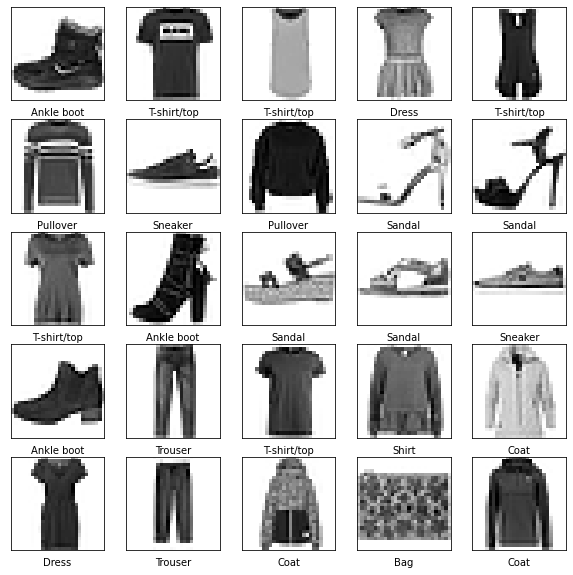

In [5]:
show_imgs()

<h1>Creating Our Model</h1>

Tensorflow lets us create a model super easily. A "Dense" layer is just a layer that is fully connected to the next layer, this is the basic type of layer that we are familiar with. Then all we need to do is specify how many neurons there should be in the given layer and tensorflow figures out the rest.

In [6]:
def create_model():
  model = keras.Sequential()
  # Flatten out the images to be a single row instead of a 28x28 image
  model.add(keras.layers.Flatten(input_shape=(28, 28)))

  # 128 is the number of neurons on this layer
  model.add(keras.layers.Dense(128, activation='relu'))

  # The final layer has 10 outputs to represent the 10 different classes
  model.add(keras.layers.Dense(num_epochs))

  return model

In [7]:
model = create_model()
# The optimizer is just an algorithm that helps the AI learn faster
# The loss is Sparse Categorical Crossentropy, the name is scary but it just means that 
# the outputs are converted to percentages and then compared to the expected output
# Metrics = accuracy means that we only care about how close the answer was to the actual answer 
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

2022-06-14 20:41:16.346353: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-06-14 20:41:16.346623: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-14 20:41:16.346829: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


<h1>Training our Model</h1>

Tensorflow makes training easy. All we need to do is give it the input data and the expected outputs with the number of epochs to train for and it will handle the rest!

In [10]:
model.fit(train_images, train_labels, epochs=num_epochs)

Epoch 1/10
   1/1875 [..............................] - ETA: 10s - loss: 0.3423 - accuracy: 0.8750

  13/1875 [..............................] - ETA: 8s - loss: 0.4720 - accuracy: 0.8269 

  31/1875 [..............................] - ETA: 6s - loss: 0.4602 - accuracy: 0.8417

  47/1875 [..............................] - ETA: 6s - loss: 0.4604 - accuracy: 0.8451

  65/1875 [>.............................] - ETA: 5s - loss: 0.4583 - accuracy: 0.8462

  81/1875 [>.............................] - ETA: 5s - loss: 0.4528 - accuracy: 0.8465

  90/1875 [>.............................] - ETA: 6s - loss: 0.4615 - accuracy: 0.8427

 107/1875 [>.............................] - ETA: 6s - loss: 0.4508 - accuracy: 0.8458

 122/1875 [>.............................] - ETA: 6s - loss: 0.4478 - accuracy: 0.8440

 134/1875 [=>............................] - ETA: 6s - loss: 0.4416 - accuracy: 0.8458

 145/1875 [=>............................] - ETA: 6s - loss: 0.4343 - accuracy: 0.8489

 157/1875 [=>............................] - ETA: 6s - loss: 0.4363 - accuracy: 0.8475

 170/1875 [=>............................] - ETA: 6s - loss: 0.4408 - accuracy: 0.8465

 187/1875 [=>............................] - ETA: 6s - loss: 0.4489 - accuracy: 0.8426

 207/1875 [==>...........................] - ETA: 6s - loss: 0.4569 - accuracy: 0.8412

 227/1875 [==>...........................] - ETA: 5s - loss: 0.4607 - accuracy: 0.8409

 245/1875 [==>...........................] - ETA: 5s - loss: 0.4628 - accuracy: 0.8401

 248/1875 [==>...........................] - ETA: 6s - loss: 0.4660 - accuracy: 0.8390

 263/1875 [===>..........................] - ETA: 5s - loss: 0.4627 - accuracy: 0.8411

 281/1875 [===>..........................] - ETA: 5s - loss: 0.4638 - accuracy: 0.8409

 300/1875 [===>..........................] - ETA: 5s - loss: 0.4640 - accuracy: 0.8405

 308/1875 [===>..........................] - ETA: 5s - loss: 0.4670 - accuracy: 0.8402

 321/1875 [====>.........................] - ETA: 5s - loss: 0.4669 - accuracy: 0.8394

 338/1875 [====>.........................] - ETA: 5s - loss: 0.4662 - accuracy: 0.8387

 353/1875 [====>.........................] - ETA: 5s - loss: 0.4658 - accuracy: 0.8385

 368/1875 [====>.........................] - ETA: 5s - loss: 0.4675 - accuracy: 0.8387

 376/1875 [=====>........................] - ETA: 5s - loss: 0.4690 - accuracy: 0.8385

 394/1875 [=====>........................] - ETA: 5s - loss: 0.4755 - accuracy: 0.8365

 412/1875 [=====>........................] - ETA: 5s - loss: 0.4778 - accuracy: 0.8359

 429/1875 [=====>........................] - ETA: 5s - loss: 0.4787 - accuracy: 0.8352

 445/1875 [======>.......................] - ETA: 5s - loss: 0.4791 - accuracy: 0.8346

 462/1875 [======>.......................] - ETA: 5s - loss: 0.4800 - accuracy: 0.8341

 477/1875 [======>.......................] - ETA: 5s - loss: 0.4791 - accuracy: 0.8343

 496/1875 [======>.......................] - ETA: 4s - loss: 0.4764 - accuracy: 0.8351

 510/1875 [=======>......................] - ETA: 4s - loss: 0.4793 - accuracy: 0.8344

 522/1875 [=======>......................] - ETA: 4s - loss: 0.4803 - accuracy: 0.8347

 535/1875 [=======>......................] - ETA: 4s - loss: 0.4804 - accuracy: 0.8348

 545/1875 [=======>......................] - ETA: 4s - loss: 0.4795 - accuracy: 0.8352

 556/1875 [=======>......................] - ETA: 4s - loss: 0.4779 - accuracy: 0.8356

 569/1875 [========>.....................] - ETA: 4s - loss: 0.4782 - accuracy: 0.8353

 582/1875 [========>.....................] - ETA: 4s - loss: 0.4796 - accuracy: 0.8343

 590/1875 [========>.....................] - ETA: 4s - loss: 0.4794 - accuracy: 0.8343

 601/1875 [========>.....................] - ETA: 4s - loss: 0.4804 - accuracy: 0.8346

 613/1875 [========>.....................] - ETA: 4s - loss: 0.4771 - accuracy: 0.8354

 624/1875 [========>.....................] - ETA: 4s - loss: 0.4771 - accuracy: 0.8351

 637/1875 [=========>....................] - ETA: 4s - loss: 0.4780 - accuracy: 0.8351

 655/1875 [=========>....................] - ETA: 4s - loss: 0.4772 - accuracy: 0.8354

 673/1875 [=========>....................] - ETA: 4s - loss: 0.4775 - accuracy: 0.8354

 685/1875 [=========>....................] - ETA: 4s - loss: 0.4769 - accuracy: 0.8359

 696/1875 [==========>...................] - ETA: 4s - loss: 0.4752 - accuracy: 0.8362

 705/1875 [==========>...................] - ETA: 4s - loss: 0.4738 - accuracy: 0.8364

 716/1875 [==========>...................] - ETA: 4s - loss: 0.4729 - accuracy: 0.8370

 727/1875 [==========>...................] - ETA: 4s - loss: 0.4736 - accuracy: 0.8365

 736/1875 [==========>...................] - ETA: 4s - loss: 0.4729 - accuracy: 0.8366

 746/1875 [==========>...................] - ETA: 4s - loss: 0.4720 - accuracy: 0.8370

 756/1875 [===========>..................] - ETA: 4s - loss: 0.4718 - accuracy: 0.8370

 765/1875 [===========>..................] - ETA: 4s - loss: 0.4713 - accuracy: 0.8371

 773/1875 [===========>..................] - ETA: 4s - loss: 0.4706 - accuracy: 0.8371

 784/1875 [===========>..................] - ETA: 4s - loss: 0.4701 - accuracy: 0.8373

 795/1875 [===========>..................] - ETA: 4s - loss: 0.4700 - accuracy: 0.8376

 805/1875 [===========>..................] - ETA: 4s - loss: 0.4704 - accuracy: 0.8376

 814/1875 [============>.................] - ETA: 4s - loss: 0.4712 - accuracy: 0.8375

 829/1875 [============>.................] - ETA: 4s - loss: 0.4707 - accuracy: 0.8376

 845/1875 [============>.................] - ETA: 4s - loss: 0.4698 - accuracy: 0.8381

 856/1875 [============>.................] - ETA: 4s - loss: 0.4696 - accuracy: 0.8384

 868/1875 [============>.................] - ETA: 3s - loss: 0.4700 - accuracy: 0.8384

 881/1875 [=============>................] - ETA: 3s - loss: 0.4699 - accuracy: 0.8385

 894/1875 [=============>................] - ETA: 3s - loss: 0.4711 - accuracy: 0.8383

 905/1875 [=============>................] - ETA: 3s - loss: 0.4705 - accuracy: 0.8385

 916/1875 [=============>................] - ETA: 3s - loss: 0.4716 - accuracy: 0.8378

 931/1875 [=============>................] - ETA: 3s - loss: 0.4721 - accuracy: 0.8376

 946/1875 [==============>...............] - ETA: 3s - loss: 0.4735 - accuracy: 0.8371

 958/1875 [==============>...............] - ETA: 3s - loss: 0.4730 - accuracy: 0.8370

 969/1875 [==============>...............] - ETA: 3s - loss: 0.4727 - accuracy: 0.8373

 984/1875 [==============>...............] - ETA: 3s - loss: 0.4737 - accuracy: 0.8370

 996/1875 [==============>...............] - ETA: 3s - loss: 0.4743 - accuracy: 0.8371

1009/1875 [===============>..............] - ETA: 3s - loss: 0.4749 - accuracy: 0.8372

1022/1875 [===============>..............] - ETA: 3s - loss: 0.4755 - accuracy: 0.8371

1034/1875 [===============>..............] - ETA: 3s - loss: 0.4766 - accuracy: 0.8369

1046/1875 [===============>..............] - ETA: 3s - loss: 0.4760 - accuracy: 0.8369

1060/1875 [===============>..............] - ETA: 3s - loss: 0.4757 - accuracy: 0.8367

1070/1875 [================>.............] - ETA: 3s - loss: 0.4753 - accuracy: 0.8369

1081/1875 [================>.............] - ETA: 3s - loss: 0.4740 - accuracy: 0.8373

1090/1875 [================>.............] - ETA: 3s - loss: 0.4742 - accuracy: 0.8371

1099/1875 [================>.............] - ETA: 3s - loss: 0.4736 - accuracy: 0.8374

1109/1875 [================>.............] - ETA: 3s - loss: 0.4739 - accuracy: 0.8374

1119/1875 [================>.............] - ETA: 3s - loss: 0.4745 - accuracy: 0.8372

1127/1875 [=================>............] - ETA: 3s - loss: 0.4751 - accuracy: 0.8371

1133/1875 [=================>............] - ETA: 3s - loss: 0.4748 - accuracy: 0.8372

1144/1875 [=================>............] - ETA: 2s - loss: 0.4754 - accuracy: 0.8369

1153/1875 [=================>............] - ETA: 2s - loss: 0.4747 - accuracy: 0.8371

1169/1875 [=================>............] - ETA: 2s - loss: 0.4753 - accuracy: 0.8366

1177/1875 [=================>............] - ETA: 2s - loss: 0.4747 - accuracy: 0.8366

1187/1875 [=================>............] - ETA: 2s - loss: 0.4746 - accuracy: 0.8366

1197/1875 [==================>...........] - ETA: 2s - loss: 0.4747 - accuracy: 0.8367

1206/1875 [==================>...........] - ETA: 2s - loss: 0.4746 - accuracy: 0.8369

1215/1875 [==================>...........] - ETA: 2s - loss: 0.4743 - accuracy: 0.8372

1225/1875 [==================>...........] - ETA: 2s - loss: 0.4745 - accuracy: 0.8372

1234/1875 [==================>...........] - ETA: 2s - loss: 0.4739 - accuracy: 0.8373

1243/1875 [==================>...........] - ETA: 2s - loss: 0.4736 - accuracy: 0.8374

1253/1875 [===================>..........] - ETA: 2s - loss: 0.4737 - accuracy: 0.8376

1262/1875 [===================>..........] - ETA: 2s - loss: 0.4741 - accuracy: 0.8375

1273/1875 [===================>..........] - ETA: 2s - loss: 0.4737 - accuracy: 0.8375

1281/1875 [===================>..........] - ETA: 2s - loss: 0.4735 - accuracy: 0.8375

1291/1875 [===================>..........] - ETA: 2s - loss: 0.4742 - accuracy: 0.8375

1301/1875 [===================>..........] - ETA: 2s - loss: 0.4739 - accuracy: 0.8378

1311/1875 [===================>..........] - ETA: 2s - loss: 0.4732 - accuracy: 0.8380

1319/1875 [====================>.........] - ETA: 2s - loss: 0.4735 - accuracy: 0.8378

1329/1875 [====================>.........] - ETA: 2s - loss: 0.4735 - accuracy: 0.8378

1339/1875 [====================>.........] - ETA: 2s - loss: 0.4733 - accuracy: 0.8380

1354/1875 [====================>.........] - ETA: 2s - loss: 0.4739 - accuracy: 0.8376

1365/1875 [====================>.........] - ETA: 2s - loss: 0.4738 - accuracy: 0.8376

1374/1875 [====================>.........] - ETA: 2s - loss: 0.4743 - accuracy: 0.8374

1384/1875 [=====================>........] - ETA: 2s - loss: 0.4743 - accuracy: 0.8376

1389/1875 [=====================>........] - ETA: 2s - loss: 0.4737 - accuracy: 0.8378

1398/1875 [=====================>........] - ETA: 2s - loss: 0.4737 - accuracy: 0.8379

1408/1875 [=====================>........] - ETA: 2s - loss: 0.4742 - accuracy: 0.8380

1419/1875 [=====================>........] - ETA: 1s - loss: 0.4739 - accuracy: 0.8379

1428/1875 [=====================>........] - ETA: 1s - loss: 0.4732 - accuracy: 0.8381

1437/1875 [=====================>........] - ETA: 1s - loss: 0.4722 - accuracy: 0.8383

1446/1875 [======================>.......] - ETA: 1s - loss: 0.4725 - accuracy: 0.8383

1455/1875 [======================>.......] - ETA: 1s - loss: 0.4724 - accuracy: 0.8383

1464/1875 [======================>.......] - ETA: 1s - loss: 0.4730 - accuracy: 0.8383

1473/1875 [======================>.......] - ETA: 1s - loss: 0.4735 - accuracy: 0.8380

1482/1875 [======================>.......] - ETA: 1s - loss: 0.4733 - accuracy: 0.8381

1492/1875 [======================>.......] - ETA: 1s - loss: 0.4731 - accuracy: 0.8382

1501/1875 [=======================>......] - ETA: 1s - loss: 0.4728 - accuracy: 0.8383

1510/1875 [=======================>......] - ETA: 1s - loss: 0.4722 - accuracy: 0.8386

1520/1875 [=======================>......] - ETA: 1s - loss: 0.4717 - accuracy: 0.8388

1528/1875 [=======================>......] - ETA: 1s - loss: 0.4723 - accuracy: 0.8387

1537/1875 [=======================>......] - ETA: 1s - loss: 0.4718 - accuracy: 0.8388

1546/1875 [=======================>......] - ETA: 1s - loss: 0.4717 - accuracy: 0.8389

1556/1875 [=======================>......] - ETA: 1s - loss: 0.4715 - accuracy: 0.8390

1567/1875 [========================>.....] - ETA: 1s - loss: 0.4720 - accuracy: 0.8386

1575/1875 [========================>.....] - ETA: 1s - loss: 0.4721 - accuracy: 0.8386

1584/1875 [========================>.....] - ETA: 1s - loss: 0.4719 - accuracy: 0.8387

1595/1875 [========================>.....] - ETA: 1s - loss: 0.4720 - accuracy: 0.8387

1607/1875 [========================>.....] - ETA: 1s - loss: 0.4720 - accuracy: 0.8386

1615/1875 [========================>.....] - ETA: 1s - loss: 0.4717 - accuracy: 0.8386

1624/1875 [========================>.....] - ETA: 1s - loss: 0.4719 - accuracy: 0.8386

1630/1875 [=========================>....] - ETA: 1s - loss: 0.4719 - accuracy: 0.8385

1643/1875 [=========================>....] - ETA: 1s - loss: 0.4728 - accuracy: 0.8383

1665/1875 [=========================>....] - ETA: 0s - loss: 0.4725 - accuracy: 0.8387

1686/1875 [=========================>....] - ETA: 0s - loss: 0.4719 - accuracy: 0.8389

1695/1875 [==========================>...] - ETA: 0s - loss: 0.4718 - accuracy: 0.8389

1709/1875 [==========================>...] - ETA: 0s - loss: 0.4723 - accuracy: 0.8388

1722/1875 [==========================>...] - ETA: 0s - loss: 0.4722 - accuracy: 0.8388

1732/1875 [==========================>...] - ETA: 0s - loss: 0.4724 - accuracy: 0.8388

1742/1875 [==========================>...] - ETA: 0s - loss: 0.4720 - accuracy: 0.8390

1753/1875 [===========================>..] - ETA: 0s - loss: 0.4716 - accuracy: 0.8390

1765/1875 [===========================>..] - ETA: 0s - loss: 0.4714 - accuracy: 0.8389

1774/1875 [===========================>..] - ETA: 0s - loss: 0.4708 - accuracy: 0.8391

1781/1875 [===========================>..] - ETA: 0s - loss: 0.4712 - accuracy: 0.8390

1790/1875 [===========================>..] - ETA: 0s - loss: 0.4711 - accuracy: 0.8389

1803/1875 [===========================>..] - ETA: 0s - loss: 0.4714 - accuracy: 0.8388

1813/1875 [============================>.] - ETA: 0s - loss: 0.4715 - accuracy: 0.8387

1823/1875 [============================>.] - ETA: 0s - loss: 0.4718 - accuracy: 0.8386

1833/1875 [============================>.] - ETA: 0s - loss: 0.4713 - accuracy: 0.8388

1846/1875 [============================>.] - ETA: 0s - loss: 0.4711 - accuracy: 0.8387

1856/1875 [============================>.] - ETA: 0s - loss: 0.4706 - accuracy: 0.8389

1865/1875 [============================>.] - ETA: 0s - loss: 0.4708 - accuracy: 0.8388

1875/1875 [==============================] - ETA: 0s - loss: 0.4713 - accuracy: 0.8386

1875/1875 [==============================] - 8s 4ms/step - loss: 0.4713 - accuracy: 0.8386


Epoch 2/10
   1/1875 [..............................] - ETA: 20s - loss: 0.6361 - accuracy: 0.8125

  17/1875 [..............................] - ETA: 5s - loss: 0.5209 - accuracy: 0.8401 

  31/1875 [..............................] - ETA: 6s - loss: 0.4779 - accuracy: 0.8327

  45/1875 [..............................] - ETA: 6s - loss: 0.4496 - accuracy: 0.8458

  60/1875 [..............................] - ETA: 6s - loss: 0.4537 - accuracy: 0.8411

  74/1875 [>.............................] - ETA: 6s - loss: 0.4422 - accuracy: 0.8433

  88/1875 [>.............................] - ETA: 6s - loss: 0.4482 - accuracy: 0.8448

  97/1875 [>.............................] - ETA: 6s - loss: 0.4483 - accuracy: 0.8463

 111/1875 [>.............................] - ETA: 6s - loss: 0.4442 - accuracy: 0.8497

 118/1875 [>.............................] - ETA: 6s - loss: 0.4437 - accuracy: 0.8501

 128/1875 [=>............................] - ETA: 7s - loss: 0.4516 - accuracy: 0.8469

 141/1875 [=>............................] - ETA: 6s - loss: 0.4582 - accuracy: 0.8464

 155/1875 [=>............................] - ETA: 6s - loss: 0.4561 - accuracy: 0.8450

 166/1875 [=>............................] - ETA: 6s - loss: 0.4551 - accuracy: 0.8449

 177/1875 [=>............................] - ETA: 6s - loss: 0.4623 - accuracy: 0.8441

 188/1875 [==>...........................] - ETA: 6s - loss: 0.4655 - accuracy: 0.8436

 200/1875 [==>...........................] - ETA: 6s - loss: 0.4671 - accuracy: 0.8436

 210/1875 [==>...........................] - ETA: 6s - loss: 0.4701 - accuracy: 0.8435

 222/1875 [==>...........................] - ETA: 6s - loss: 0.4720 - accuracy: 0.8429

 236/1875 [==>...........................] - ETA: 6s - loss: 0.4714 - accuracy: 0.8432

 248/1875 [==>...........................] - ETA: 6s - loss: 0.4724 - accuracy: 0.8426

 260/1875 [===>..........................] - ETA: 6s - loss: 0.4729 - accuracy: 0.8415

 268/1875 [===>..........................] - ETA: 7s - loss: 0.4734 - accuracy: 0.8411

 280/1875 [===>..........................] - ETA: 6s - loss: 0.4760 - accuracy: 0.8404

 295/1875 [===>..........................] - ETA: 6s - loss: 0.4747 - accuracy: 0.8409

 309/1875 [===>..........................] - ETA: 6s - loss: 0.4752 - accuracy: 0.8410

 316/1875 [====>.........................] - ETA: 6s - loss: 0.4762 - accuracy: 0.8407

 327/1875 [====>.........................] - ETA: 6s - loss: 0.4770 - accuracy: 0.8399

 337/1875 [====>.........................] - ETA: 6s - loss: 0.4757 - accuracy: 0.8403

 351/1875 [====>.........................] - ETA: 6s - loss: 0.4721 - accuracy: 0.8413

 371/1875 [====>.........................] - ETA: 6s - loss: 0.4712 - accuracy: 0.8411

 390/1875 [=====>........................] - ETA: 6s - loss: 0.4725 - accuracy: 0.8411

 407/1875 [=====>........................] - ETA: 6s - loss: 0.4718 - accuracy: 0.8408

 417/1875 [=====>........................] - ETA: 6s - loss: 0.4721 - accuracy: 0.8408

 432/1875 [=====>........................] - ETA: 6s - loss: 0.4715 - accuracy: 0.8411

 443/1875 [======>.......................] - ETA: 6s - loss: 0.4716 - accuracy: 0.8414

 453/1875 [======>.......................] - ETA: 6s - loss: 0.4725 - accuracy: 0.8408

 466/1875 [======>.......................] - ETA: 5s - loss: 0.4736 - accuracy: 0.8401

 476/1875 [======>.......................] - ETA: 5s - loss: 0.4731 - accuracy: 0.8398

 488/1875 [======>.......................] - ETA: 5s - loss: 0.4713 - accuracy: 0.8399

 499/1875 [======>.......................] - ETA: 5s - loss: 0.4725 - accuracy: 0.8397

 511/1875 [=======>......................] - ETA: 5s - loss: 0.4705 - accuracy: 0.8400

 519/1875 [=======>......................] - ETA: 5s - loss: 0.4688 - accuracy: 0.8401

 532/1875 [=======>......................] - ETA: 5s - loss: 0.4680 - accuracy: 0.8403

 543/1875 [=======>......................] - ETA: 5s - loss: 0.4663 - accuracy: 0.8409

 552/1875 [=======>......................] - ETA: 5s - loss: 0.4667 - accuracy: 0.8406

 564/1875 [========>.....................] - ETA: 5s - loss: 0.4666 - accuracy: 0.8406

 576/1875 [========>.....................] - ETA: 5s - loss: 0.4642 - accuracy: 0.8414

 590/1875 [========>.....................] - ETA: 5s - loss: 0.4648 - accuracy: 0.8409

 607/1875 [========>.....................] - ETA: 5s - loss: 0.4643 - accuracy: 0.8411

 626/1875 [=========>....................] - ETA: 5s - loss: 0.4653 - accuracy: 0.8412

 638/1875 [=========>....................] - ETA: 5s - loss: 0.4668 - accuracy: 0.8410

 655/1875 [=========>....................] - ETA: 5s - loss: 0.4658 - accuracy: 0.8405

 673/1875 [=========>....................] - ETA: 5s - loss: 0.4654 - accuracy: 0.8409

 692/1875 [==========>...................] - ETA: 4s - loss: 0.4645 - accuracy: 0.8415

 703/1875 [==========>...................] - ETA: 4s - loss: 0.4644 - accuracy: 0.8413

 718/1875 [==========>...................] - ETA: 4s - loss: 0.4641 - accuracy: 0.8414

 735/1875 [==========>...................] - ETA: 4s - loss: 0.4637 - accuracy: 0.8418

 753/1875 [===========>..................] - ETA: 4s - loss: 0.4640 - accuracy: 0.8420

 769/1875 [===========>..................] - ETA: 4s - loss: 0.4627 - accuracy: 0.8426

 780/1875 [===========>..................] - ETA: 4s - loss: 0.4651 - accuracy: 0.8414

 793/1875 [===========>..................] - ETA: 4s - loss: 0.4663 - accuracy: 0.8409

 811/1875 [===========>..................] - ETA: 4s - loss: 0.4642 - accuracy: 0.8411

 827/1875 [============>.................] - ETA: 4s - loss: 0.4634 - accuracy: 0.8408

 843/1875 [============>.................] - ETA: 4s - loss: 0.4651 - accuracy: 0.8402

 862/1875 [============>.................] - ETA: 4s - loss: 0.4646 - accuracy: 0.8403

 881/1875 [=============>................] - ETA: 3s - loss: 0.4659 - accuracy: 0.8399

 895/1875 [=============>................] - ETA: 3s - loss: 0.4655 - accuracy: 0.8402

 906/1875 [=============>................] - ETA: 3s - loss: 0.4647 - accuracy: 0.8404

 918/1875 [=============>................] - ETA: 3s - loss: 0.4648 - accuracy: 0.8403

 933/1875 [=============>................] - ETA: 3s - loss: 0.4645 - accuracy: 0.8402

 949/1875 [==============>...............] - ETA: 3s - loss: 0.4648 - accuracy: 0.8402

 960/1875 [==============>...............] - ETA: 3s - loss: 0.4660 - accuracy: 0.8399

 971/1875 [==============>...............] - ETA: 3s - loss: 0.4664 - accuracy: 0.8399

 981/1875 [==============>...............] - ETA: 3s - loss: 0.4661 - accuracy: 0.8399

 996/1875 [==============>...............] - ETA: 3s - loss: 0.4662 - accuracy: 0.8398

1009/1875 [===============>..............] - ETA: 3s - loss: 0.4661 - accuracy: 0.8397

1020/1875 [===============>..............] - ETA: 3s - loss: 0.4656 - accuracy: 0.8396

1027/1875 [===============>..............] - ETA: 3s - loss: 0.4653 - accuracy: 0.8399

1039/1875 [===============>..............] - ETA: 3s - loss: 0.4657 - accuracy: 0.8399

1049/1875 [===============>..............] - ETA: 3s - loss: 0.4664 - accuracy: 0.8399

1063/1875 [================>.............] - ETA: 3s - loss: 0.4660 - accuracy: 0.8402

1074/1875 [================>.............] - ETA: 3s - loss: 0.4668 - accuracy: 0.8400

1089/1875 [================>.............] - ETA: 3s - loss: 0.4673 - accuracy: 0.8400

1099/1875 [================>.............] - ETA: 3s - loss: 0.4675 - accuracy: 0.8401

1110/1875 [================>.............] - ETA: 3s - loss: 0.4676 - accuracy: 0.8401

1122/1875 [================>.............] - ETA: 3s - loss: 0.4675 - accuracy: 0.8399

1135/1875 [=================>............] - ETA: 2s - loss: 0.4681 - accuracy: 0.8398

1145/1875 [=================>............] - ETA: 2s - loss: 0.4680 - accuracy: 0.8400

1161/1875 [=================>............] - ETA: 2s - loss: 0.4683 - accuracy: 0.8402

1173/1875 [=================>............] - ETA: 2s - loss: 0.4676 - accuracy: 0.8404

1186/1875 [=================>............] - ETA: 2s - loss: 0.4681 - accuracy: 0.8400

1198/1875 [==================>...........] - ETA: 2s - loss: 0.4688 - accuracy: 0.8399

1213/1875 [==================>...........] - ETA: 2s - loss: 0.4690 - accuracy: 0.8396

1227/1875 [==================>...........] - ETA: 2s - loss: 0.4684 - accuracy: 0.8400

1242/1875 [==================>...........] - ETA: 2s - loss: 0.4682 - accuracy: 0.8402

1252/1875 [===================>..........] - ETA: 2s - loss: 0.4681 - accuracy: 0.8401

1264/1875 [===================>..........] - ETA: 2s - loss: 0.4677 - accuracy: 0.8402

1278/1875 [===================>..........] - ETA: 2s - loss: 0.4678 - accuracy: 0.8401

1290/1875 [===================>..........] - ETA: 2s - loss: 0.4674 - accuracy: 0.8402

1301/1875 [===================>..........] - ETA: 2s - loss: 0.4671 - accuracy: 0.8402

1316/1875 [====================>.........] - ETA: 2s - loss: 0.4668 - accuracy: 0.8401

1324/1875 [====================>.........] - ETA: 2s - loss: 0.4673 - accuracy: 0.8400

1342/1875 [====================>.........] - ETA: 2s - loss: 0.4670 - accuracy: 0.8403

1354/1875 [====================>.........] - ETA: 2s - loss: 0.4662 - accuracy: 0.8404

1365/1875 [====================>.........] - ETA: 2s - loss: 0.4662 - accuracy: 0.8404

1377/1875 [=====================>........] - ETA: 2s - loss: 0.4666 - accuracy: 0.8402

1392/1875 [=====================>........] - ETA: 1s - loss: 0.4662 - accuracy: 0.8404

1405/1875 [=====================>........] - ETA: 1s - loss: 0.4656 - accuracy: 0.8405

1417/1875 [=====================>........] - ETA: 1s - loss: 0.4654 - accuracy: 0.8406

1430/1875 [=====================>........] - ETA: 1s - loss: 0.4650 - accuracy: 0.8407

1442/1875 [======================>.......] - ETA: 1s - loss: 0.4652 - accuracy: 0.8408

1457/1875 [======================>.......] - ETA: 1s - loss: 0.4649 - accuracy: 0.8410

1471/1875 [======================>.......] - ETA: 1s - loss: 0.4646 - accuracy: 0.8411

1485/1875 [======================>.......] - ETA: 1s - loss: 0.4651 - accuracy: 0.8408

1497/1875 [======================>.......] - ETA: 1s - loss: 0.4667 - accuracy: 0.8405

1510/1875 [=======================>......] - ETA: 1s - loss: 0.4663 - accuracy: 0.8406

1525/1875 [=======================>......] - ETA: 1s - loss: 0.4663 - accuracy: 0.8406

1532/1875 [=======================>......] - ETA: 1s - loss: 0.4666 - accuracy: 0.8406

1543/1875 [=======================>......] - ETA: 1s - loss: 0.4660 - accuracy: 0.8405

1555/1875 [=======================>......] - ETA: 1s - loss: 0.4663 - accuracy: 0.8404

1571/1875 [========================>.....] - ETA: 1s - loss: 0.4661 - accuracy: 0.8406

1583/1875 [========================>.....] - ETA: 1s - loss: 0.4657 - accuracy: 0.8406

1588/1875 [========================>.....] - ETA: 1s - loss: 0.4657 - accuracy: 0.8405

1602/1875 [========================>.....] - ETA: 1s - loss: 0.4659 - accuracy: 0.8403

1616/1875 [========================>.....] - ETA: 1s - loss: 0.4657 - accuracy: 0.8404

1627/1875 [=========================>....] - ETA: 1s - loss: 0.4653 - accuracy: 0.8405

1643/1875 [=========================>....] - ETA: 0s - loss: 0.4668 - accuracy: 0.8402

1654/1875 [=========================>....] - ETA: 0s - loss: 0.4678 - accuracy: 0.8398

1665/1875 [=========================>....] - ETA: 0s - loss: 0.4680 - accuracy: 0.8397

1677/1875 [=========================>....] - ETA: 0s - loss: 0.4682 - accuracy: 0.8396

1688/1875 [==========================>...] - ETA: 0s - loss: 0.4684 - accuracy: 0.8394

1698/1875 [==========================>...] - ETA: 0s - loss: 0.4679 - accuracy: 0.8396

1711/1875 [==========================>...] - ETA: 0s - loss: 0.4679 - accuracy: 0.8397

1718/1875 [==========================>...] - ETA: 0s - loss: 0.4685 - accuracy: 0.8396

1727/1875 [==========================>...] - ETA: 0s - loss: 0.4690 - accuracy: 0.8395

1737/1875 [==========================>...] - ETA: 0s - loss: 0.4688 - accuracy: 0.8395

1746/1875 [==========================>...] - ETA: 0s - loss: 0.4683 - accuracy: 0.8396

1757/1875 [===========================>..] - ETA: 0s - loss: 0.4677 - accuracy: 0.8399

1773/1875 [===========================>..] - ETA: 0s - loss: 0.4675 - accuracy: 0.8397

1793/1875 [===========================>..] - ETA: 0s - loss: 0.4676 - accuracy: 0.8397

1812/1875 [===========================>..] - ETA: 0s - loss: 0.4676 - accuracy: 0.8399

1821/1875 [============================>.] - ETA: 0s - loss: 0.4674 - accuracy: 0.8399

1834/1875 [============================>.] - ETA: 0s - loss: 0.4673 - accuracy: 0.8397

1842/1875 [============================>.] - ETA: 0s - loss: 0.4671 - accuracy: 0.8397

1855/1875 [============================>.] - ETA: 0s - loss: 0.4669 - accuracy: 0.8398

1868/1875 [============================>.] - ETA: 0s - loss: 0.4668 - accuracy: 0.8397

1875/1875 [==============================] - 8s 4ms/step - loss: 0.4665 - accuracy: 0.8398


Epoch 3/10
   1/1875 [..............................] - ETA: 12s - loss: 0.4254 - accuracy: 0.8750

  15/1875 [..............................] - ETA: 6s - loss: 0.5722 - accuracy: 0.8271 

  25/1875 [..............................] - ETA: 7s - loss: 0.5150 - accuracy: 0.8338

  33/1875 [..............................] - ETA: 8s - loss: 0.4873 - accuracy: 0.8428

  44/1875 [..............................] - ETA: 9s - loss: 0.4792 - accuracy: 0.8438

  57/1875 [..............................] - ETA: 8s - loss: 0.4619 - accuracy: 0.8492

  72/1875 [>.............................] - ETA: 7s - loss: 0.4697 - accuracy: 0.8424

  81/1875 [>.............................] - ETA: 8s - loss: 0.4733 - accuracy: 0.8395

  85/1875 [>.............................] - ETA: 8s - loss: 0.4737 - accuracy: 0.8390

 100/1875 [>.............................] - ETA: 8s - loss: 0.4727 - accuracy: 0.8391

 113/1875 [>.............................] - ETA: 8s - loss: 0.4763 - accuracy: 0.8379

 128/1875 [=>............................] - ETA: 7s - loss: 0.4720 - accuracy: 0.8367

 140/1875 [=>............................] - ETA: 7s - loss: 0.4819 - accuracy: 0.8328

 148/1875 [=>............................] - ETA: 7s - loss: 0.4792 - accuracy: 0.8338

 163/1875 [=>............................] - ETA: 7s - loss: 0.4780 - accuracy: 0.8351

 176/1875 [=>............................] - ETA: 7s - loss: 0.4804 - accuracy: 0.8345

 184/1875 [=>............................] - ETA: 7s - loss: 0.4796 - accuracy: 0.8344

 195/1875 [==>...........................] - ETA: 7s - loss: 0.4791 - accuracy: 0.8340

 209/1875 [==>...........................] - ETA: 7s - loss: 0.4766 - accuracy: 0.8346

 222/1875 [==>...........................] - ETA: 7s - loss: 0.4752 - accuracy: 0.8350

 238/1875 [==>...........................] - ETA: 7s - loss: 0.4749 - accuracy: 0.8356

 252/1875 [===>..........................] - ETA: 7s - loss: 0.4735 - accuracy: 0.8362

 265/1875 [===>..........................] - ETA: 6s - loss: 0.4687 - accuracy: 0.8379

 280/1875 [===>..........................] - ETA: 6s - loss: 0.4673 - accuracy: 0.8384

 299/1875 [===>..........................] - ETA: 6s - loss: 0.4668 - accuracy: 0.8381

 313/1875 [====>.........................] - ETA: 6s - loss: 0.4677 - accuracy: 0.8386

 330/1875 [====>.........................] - ETA: 6s - loss: 0.4685 - accuracy: 0.8384

 350/1875 [====>.........................] - ETA: 6s - loss: 0.4724 - accuracy: 0.8366

 364/1875 [====>.........................] - ETA: 6s - loss: 0.4715 - accuracy: 0.8366

 379/1875 [=====>........................] - ETA: 5s - loss: 0.4699 - accuracy: 0.8368

 394/1875 [=====>........................] - ETA: 5s - loss: 0.4702 - accuracy: 0.8365

 410/1875 [=====>........................] - ETA: 5s - loss: 0.4681 - accuracy: 0.8376

 429/1875 [=====>........................] - ETA: 5s - loss: 0.4667 - accuracy: 0.8369

 444/1875 [======>.......................] - ETA: 5s - loss: 0.4675 - accuracy: 0.8365

 458/1875 [======>.......................] - ETA: 5s - loss: 0.4681 - accuracy: 0.8362

 473/1875 [======>.......................] - ETA: 5s - loss: 0.4707 - accuracy: 0.8359

 495/1875 [======>.......................] - ETA: 5s - loss: 0.4698 - accuracy: 0.8362

 509/1875 [=======>......................] - ETA: 5s - loss: 0.4677 - accuracy: 0.8366

 516/1875 [=======>......................] - ETA: 5s - loss: 0.4690 - accuracy: 0.8362

 525/1875 [=======>......................] - ETA: 5s - loss: 0.4681 - accuracy: 0.8364

 537/1875 [=======>......................] - ETA: 5s - loss: 0.4661 - accuracy: 0.8375

 555/1875 [=======>......................] - ETA: 5s - loss: 0.4651 - accuracy: 0.8388

 571/1875 [========>.....................] - ETA: 4s - loss: 0.4668 - accuracy: 0.8384

 589/1875 [========>.....................] - ETA: 4s - loss: 0.4684 - accuracy: 0.8374

 606/1875 [========>.....................] - ETA: 4s - loss: 0.4695 - accuracy: 0.8372

 619/1875 [========>.....................] - ETA: 4s - loss: 0.4693 - accuracy: 0.8369

 637/1875 [=========>....................] - ETA: 4s - loss: 0.4703 - accuracy: 0.8367

 652/1875 [=========>....................] - ETA: 4s - loss: 0.4698 - accuracy: 0.8370

 668/1875 [=========>....................] - ETA: 4s - loss: 0.4708 - accuracy: 0.8373

 683/1875 [=========>....................] - ETA: 4s - loss: 0.4709 - accuracy: 0.8377

 697/1875 [==========>...................] - ETA: 4s - loss: 0.4690 - accuracy: 0.8381

 712/1875 [==========>...................] - ETA: 4s - loss: 0.4673 - accuracy: 0.8384

 728/1875 [==========>...................] - ETA: 4s - loss: 0.4656 - accuracy: 0.8388

 744/1875 [==========>...................] - ETA: 4s - loss: 0.4651 - accuracy: 0.8388

 758/1875 [===========>..................] - ETA: 4s - loss: 0.4654 - accuracy: 0.8388

 771/1875 [===========>..................] - ETA: 4s - loss: 0.4669 - accuracy: 0.8385

 783/1875 [===========>..................] - ETA: 4s - loss: 0.4673 - accuracy: 0.8383

 798/1875 [===========>..................] - ETA: 3s - loss: 0.4668 - accuracy: 0.8383

 813/1875 [============>.................] - ETA: 3s - loss: 0.4666 - accuracy: 0.8383

 828/1875 [============>.................] - ETA: 3s - loss: 0.4663 - accuracy: 0.8384

 842/1875 [============>.................] - ETA: 3s - loss: 0.4669 - accuracy: 0.8383

 857/1875 [============>.................] - ETA: 3s - loss: 0.4664 - accuracy: 0.8380

 871/1875 [============>.................] - ETA: 3s - loss: 0.4652 - accuracy: 0.8386

 886/1875 [=============>................] - ETA: 3s - loss: 0.4649 - accuracy: 0.8391

 902/1875 [=============>................] - ETA: 3s - loss: 0.4653 - accuracy: 0.8391

 917/1875 [=============>................] - ETA: 3s - loss: 0.4658 - accuracy: 0.8388

 932/1875 [=============>................] - ETA: 3s - loss: 0.4658 - accuracy: 0.8388

 948/1875 [==============>...............] - ETA: 3s - loss: 0.4656 - accuracy: 0.8388

 963/1875 [==============>...............] - ETA: 3s - loss: 0.4648 - accuracy: 0.8393

 980/1875 [==============>...............] - ETA: 3s - loss: 0.4643 - accuracy: 0.8395

 997/1875 [==============>...............] - ETA: 3s - loss: 0.4636 - accuracy: 0.8400

1013/1875 [===============>..............] - ETA: 3s - loss: 0.4652 - accuracy: 0.8398

1029/1875 [===============>..............] - ETA: 3s - loss: 0.4641 - accuracy: 0.8399

1045/1875 [===============>..............] - ETA: 2s - loss: 0.4648 - accuracy: 0.8395

1061/1875 [===============>..............] - ETA: 2s - loss: 0.4661 - accuracy: 0.8392

1078/1875 [================>.............] - ETA: 2s - loss: 0.4657 - accuracy: 0.8392

1094/1875 [================>.............] - ETA: 2s - loss: 0.4657 - accuracy: 0.8392

1110/1875 [================>.............] - ETA: 2s - loss: 0.4643 - accuracy: 0.8395

1126/1875 [=================>............] - ETA: 2s - loss: 0.4638 - accuracy: 0.8394

1142/1875 [=================>............] - ETA: 2s - loss: 0.4643 - accuracy: 0.8395

1158/1875 [=================>............] - ETA: 2s - loss: 0.4642 - accuracy: 0.8396

1181/1875 [=================>............] - ETA: 2s - loss: 0.4658 - accuracy: 0.8397

1197/1875 [==================>...........] - ETA: 2s - loss: 0.4667 - accuracy: 0.8395

1216/1875 [==================>...........] - ETA: 2s - loss: 0.4672 - accuracy: 0.8392

1221/1875 [==================>...........] - ETA: 2s - loss: 0.4668 - accuracy: 0.8392

1229/1875 [==================>...........] - ETA: 2s - loss: 0.4668 - accuracy: 0.8392

1236/1875 [==================>...........] - ETA: 2s - loss: 0.4670 - accuracy: 0.8393

1242/1875 [==================>...........] - ETA: 2s - loss: 0.4673 - accuracy: 0.8392

1248/1875 [==================>...........] - ETA: 2s - loss: 0.4672 - accuracy: 0.8393

1256/1875 [===================>..........] - ETA: 2s - loss: 0.4671 - accuracy: 0.8393

1272/1875 [===================>..........] - ETA: 2s - loss: 0.4669 - accuracy: 0.8393

1291/1875 [===================>..........] - ETA: 2s - loss: 0.4659 - accuracy: 0.8396

1310/1875 [===================>..........] - ETA: 2s - loss: 0.4652 - accuracy: 0.8400

1328/1875 [====================>.........] - ETA: 1s - loss: 0.4653 - accuracy: 0.8400

1346/1875 [====================>.........] - ETA: 1s - loss: 0.4647 - accuracy: 0.8403

1366/1875 [====================>.........] - ETA: 1s - loss: 0.4648 - accuracy: 0.8403

1383/1875 [=====================>........] - ETA: 1s - loss: 0.4644 - accuracy: 0.8405

1401/1875 [=====================>........] - ETA: 1s - loss: 0.4644 - accuracy: 0.8406

1420/1875 [=====================>........] - ETA: 1s - loss: 0.4646 - accuracy: 0.8407

1438/1875 [======================>.......] - ETA: 1s - loss: 0.4652 - accuracy: 0.8405

1455/1875 [======================>.......] - ETA: 1s - loss: 0.4648 - accuracy: 0.8406

1469/1875 [======================>.......] - ETA: 1s - loss: 0.4643 - accuracy: 0.8408

1485/1875 [======================>.......] - ETA: 1s - loss: 0.4649 - accuracy: 0.8409

1501/1875 [=======================>......] - ETA: 1s - loss: 0.4647 - accuracy: 0.8411

1518/1875 [=======================>......] - ETA: 1s - loss: 0.4641 - accuracy: 0.8414

1534/1875 [=======================>......] - ETA: 1s - loss: 0.4641 - accuracy: 0.8413

1551/1875 [=======================>......] - ETA: 1s - loss: 0.4643 - accuracy: 0.8413

1567/1875 [========================>.....] - ETA: 1s - loss: 0.4654 - accuracy: 0.8412

1582/1875 [========================>.....] - ETA: 1s - loss: 0.4667 - accuracy: 0.8407

1598/1875 [========================>.....] - ETA: 0s - loss: 0.4676 - accuracy: 0.8403

1614/1875 [========================>.....] - ETA: 0s - loss: 0.4676 - accuracy: 0.8404

1629/1875 [=========================>....] - ETA: 0s - loss: 0.4678 - accuracy: 0.8402

1645/1875 [=========================>....] - ETA: 0s - loss: 0.4681 - accuracy: 0.8401

1661/1875 [=========================>....] - ETA: 0s - loss: 0.4679 - accuracy: 0.8401

1677/1875 [=========================>....] - ETA: 0s - loss: 0.4674 - accuracy: 0.8404

1692/1875 [==========================>...] - ETA: 0s - loss: 0.4679 - accuracy: 0.8401

1707/1875 [==========================>...] - ETA: 0s - loss: 0.4673 - accuracy: 0.8403

1722/1875 [==========================>...] - ETA: 0s - loss: 0.4669 - accuracy: 0.8405

1738/1875 [==========================>...] - ETA: 0s - loss: 0.4668 - accuracy: 0.8405

1755/1875 [===========================>..] - ETA: 0s - loss: 0.4676 - accuracy: 0.8403

1770/1875 [===========================>..] - ETA: 0s - loss: 0.4673 - accuracy: 0.8403

1786/1875 [===========================>..] - ETA: 0s - loss: 0.4671 - accuracy: 0.8404

1801/1875 [===========================>..] - ETA: 0s - loss: 0.4666 - accuracy: 0.8406

1818/1875 [============================>.] - ETA: 0s - loss: 0.4665 - accuracy: 0.8406

1831/1875 [============================>.] - ETA: 0s - loss: 0.4663 - accuracy: 0.8407

1847/1875 [============================>.] - ETA: 0s - loss: 0.4656 - accuracy: 0.8409

1864/1875 [============================>.] - ETA: 0s - loss: 0.4656 - accuracy: 0.8409

1875/1875 [==============================] - 7s 3ms/step - loss: 0.4654 - accuracy: 0.8410


Epoch 4/10


   1/1875 [..............................] - ETA: 15s - loss: 0.3811 - accuracy: 0.8438

  10/1875 [..............................] - ETA: 10s - loss: 0.4501 - accuracy: 0.8625

  31/1875 [..............................] - ETA: 6s - loss: 0.4338 - accuracy: 0.8599 

  51/1875 [..............................] - ETA: 5s - loss: 0.4481 - accuracy: 0.8474

  70/1875 [>.............................] - ETA: 5s - loss: 0.4584 - accuracy: 0.8402

  88/1875 [>.............................] - ETA: 5s - loss: 0.4558 - accuracy: 0.8409

 103/1875 [>.............................] - ETA: 5s - loss: 0.4630 - accuracy: 0.8365

 113/1875 [>.............................] - ETA: 5s - loss: 0.4560 - accuracy: 0.8418

 127/1875 [=>............................] - ETA: 5s - loss: 0.4539 - accuracy: 0.8442

 147/1875 [=>............................] - ETA: 5s - loss: 0.4568 - accuracy: 0.8448

 167/1875 [=>............................] - ETA: 5s - loss: 0.4585 - accuracy: 0.8428

 186/1875 [=>............................] - ETA: 5s - loss: 0.4569 - accuracy: 0.8429

 202/1875 [==>...........................] - ETA: 5s - loss: 0.4613 - accuracy: 0.8419

 216/1875 [==>...........................] - ETA: 5s - loss: 0.4607 - accuracy: 0.8413

 229/1875 [==>...........................] - ETA: 5s - loss: 0.4618 - accuracy: 0.8409

 245/1875 [==>...........................] - ETA: 5s - loss: 0.4579 - accuracy: 0.8423

 254/1875 [===>..........................] - ETA: 5s - loss: 0.4611 - accuracy: 0.8417

 274/1875 [===>..........................] - ETA: 5s - loss: 0.4561 - accuracy: 0.8434

 292/1875 [===>..........................] - ETA: 5s - loss: 0.4553 - accuracy: 0.8435

 305/1875 [===>..........................] - ETA: 5s - loss: 0.4533 - accuracy: 0.8444

 318/1875 [====>.........................] - ETA: 5s - loss: 0.4537 - accuracy: 0.8449

 339/1875 [====>.........................] - ETA: 4s - loss: 0.4480 - accuracy: 0.8468

 360/1875 [====>.........................] - ETA: 4s - loss: 0.4485 - accuracy: 0.8477

 376/1875 [=====>........................] - ETA: 4s - loss: 0.4485 - accuracy: 0.8473

 386/1875 [=====>........................] - ETA: 4s - loss: 0.4478 - accuracy: 0.8473

 398/1875 [=====>........................] - ETA: 4s - loss: 0.4468 - accuracy: 0.8472

 409/1875 [=====>........................] - ETA: 4s - loss: 0.4473 - accuracy: 0.8471

 422/1875 [=====>........................] - ETA: 4s - loss: 0.4475 - accuracy: 0.8467

 435/1875 [=====>........................] - ETA: 4s - loss: 0.4484 - accuracy: 0.8466

 448/1875 [======>.......................] - ETA: 4s - loss: 0.4521 - accuracy: 0.8454

 460/1875 [======>.......................] - ETA: 4s - loss: 0.4530 - accuracy: 0.8452

 472/1875 [======>.......................] - ETA: 4s - loss: 0.4535 - accuracy: 0.8453

 485/1875 [======>.......................] - ETA: 4s - loss: 0.4555 - accuracy: 0.8447

 498/1875 [======>.......................] - ETA: 4s - loss: 0.4586 - accuracy: 0.8441

 512/1875 [=======>......................] - ETA: 4s - loss: 0.4645 - accuracy: 0.8426

 526/1875 [=======>......................] - ETA: 4s - loss: 0.4659 - accuracy: 0.8423

 536/1875 [=======>......................] - ETA: 4s - loss: 0.4668 - accuracy: 0.8421

 549/1875 [=======>......................] - ETA: 4s - loss: 0.4663 - accuracy: 0.8422

 562/1875 [=======>......................] - ETA: 4s - loss: 0.4658 - accuracy: 0.8426

 576/1875 [========>.....................] - ETA: 4s - loss: 0.4644 - accuracy: 0.8430

 590/1875 [========>.....................] - ETA: 4s - loss: 0.4663 - accuracy: 0.8420

 602/1875 [========>.....................] - ETA: 4s - loss: 0.4670 - accuracy: 0.8419

 615/1875 [========>.....................] - ETA: 4s - loss: 0.4649 - accuracy: 0.8429

 629/1875 [=========>....................] - ETA: 4s - loss: 0.4666 - accuracy: 0.8424

 645/1875 [=========>....................] - ETA: 4s - loss: 0.4661 - accuracy: 0.8425

 659/1875 [=========>....................] - ETA: 4s - loss: 0.4668 - accuracy: 0.8423

 675/1875 [=========>....................] - ETA: 4s - loss: 0.4657 - accuracy: 0.8425

 691/1875 [==========>...................] - ETA: 4s - loss: 0.4650 - accuracy: 0.8427

 703/1875 [==========>...................] - ETA: 4s - loss: 0.4644 - accuracy: 0.8426

 719/1875 [==========>...................] - ETA: 4s - loss: 0.4637 - accuracy: 0.8426

 735/1875 [==========>...................] - ETA: 4s - loss: 0.4617 - accuracy: 0.8432

 752/1875 [===========>..................] - ETA: 3s - loss: 0.4623 - accuracy: 0.8428

 767/1875 [===========>..................] - ETA: 3s - loss: 0.4610 - accuracy: 0.8429

 784/1875 [===========>..................] - ETA: 3s - loss: 0.4612 - accuracy: 0.8427

 800/1875 [===========>..................] - ETA: 3s - loss: 0.4604 - accuracy: 0.8429

 815/1875 [============>.................] - ETA: 3s - loss: 0.4611 - accuracy: 0.8428

 831/1875 [============>.................] - ETA: 3s - loss: 0.4595 - accuracy: 0.8430

 848/1875 [============>.................] - ETA: 3s - loss: 0.4594 - accuracy: 0.8432

 864/1875 [============>.................] - ETA: 3s - loss: 0.4590 - accuracy: 0.8431

 879/1875 [=============>................] - ETA: 3s - loss: 0.4586 - accuracy: 0.8434

 895/1875 [=============>................] - ETA: 3s - loss: 0.4586 - accuracy: 0.8433

 910/1875 [=============>................] - ETA: 3s - loss: 0.4585 - accuracy: 0.8435

 916/1875 [=============>................] - ETA: 3s - loss: 0.4585 - accuracy: 0.8434

 929/1875 [=============>................] - ETA: 3s - loss: 0.4582 - accuracy: 0.8436

 945/1875 [==============>...............] - ETA: 3s - loss: 0.4587 - accuracy: 0.8431

 961/1875 [==============>...............] - ETA: 3s - loss: 0.4592 - accuracy: 0.8429

 981/1875 [==============>...............] - ETA: 3s - loss: 0.4591 - accuracy: 0.8427

1001/1875 [===============>..............] - ETA: 3s - loss: 0.4598 - accuracy: 0.8426

1022/1875 [===============>..............] - ETA: 2s - loss: 0.4604 - accuracy: 0.8427

1042/1875 [===============>..............] - ETA: 2s - loss: 0.4607 - accuracy: 0.8429

1058/1875 [===============>..............] - ETA: 2s - loss: 0.4602 - accuracy: 0.8428

1080/1875 [================>.............] - ETA: 2s - loss: 0.4600 - accuracy: 0.8428

1101/1875 [================>.............] - ETA: 2s - loss: 0.4605 - accuracy: 0.8428

1120/1875 [================>.............] - ETA: 2s - loss: 0.4605 - accuracy: 0.8427

1141/1875 [=================>............] - ETA: 2s - loss: 0.4598 - accuracy: 0.8430

1160/1875 [=================>............] - ETA: 2s - loss: 0.4589 - accuracy: 0.8432

1181/1875 [=================>............] - ETA: 2s - loss: 0.4588 - accuracy: 0.8434

1203/1875 [==================>...........] - ETA: 2s - loss: 0.4593 - accuracy: 0.8433

1222/1875 [==================>...........] - ETA: 2s - loss: 0.4583 - accuracy: 0.8435

1242/1875 [==================>...........] - ETA: 2s - loss: 0.4569 - accuracy: 0.8438

1260/1875 [===================>..........] - ETA: 2s - loss: 0.4572 - accuracy: 0.8440

1279/1875 [===================>..........] - ETA: 1s - loss: 0.4588 - accuracy: 0.8435

1290/1875 [===================>..........] - ETA: 1s - loss: 0.4608 - accuracy: 0.8432

1301/1875 [===================>..........] - ETA: 1s - loss: 0.4615 - accuracy: 0.8429

1315/1875 [====================>.........] - ETA: 1s - loss: 0.4622 - accuracy: 0.8428

1331/1875 [====================>.........] - ETA: 1s - loss: 0.4623 - accuracy: 0.8428

1345/1875 [====================>.........] - ETA: 1s - loss: 0.4621 - accuracy: 0.8428

1360/1875 [====================>.........] - ETA: 1s - loss: 0.4625 - accuracy: 0.8426

1376/1875 [=====================>........] - ETA: 1s - loss: 0.4620 - accuracy: 0.8427

1395/1875 [=====================>........] - ETA: 1s - loss: 0.4614 - accuracy: 0.8426

1412/1875 [=====================>........] - ETA: 1s - loss: 0.4609 - accuracy: 0.8429

1428/1875 [=====================>........] - ETA: 1s - loss: 0.4609 - accuracy: 0.8427

1444/1875 [======================>.......] - ETA: 1s - loss: 0.4602 - accuracy: 0.8429

1460/1875 [======================>.......] - ETA: 1s - loss: 0.4600 - accuracy: 0.8427

1476/1875 [======================>.......] - ETA: 1s - loss: 0.4602 - accuracy: 0.8427

1488/1875 [======================>.......] - ETA: 1s - loss: 0.4599 - accuracy: 0.8426

1504/1875 [=======================>......] - ETA: 1s - loss: 0.4589 - accuracy: 0.8430

1520/1875 [=======================>......] - ETA: 1s - loss: 0.4597 - accuracy: 0.8431

1536/1875 [=======================>......] - ETA: 1s - loss: 0.4598 - accuracy: 0.8430

1552/1875 [=======================>......] - ETA: 1s - loss: 0.4603 - accuracy: 0.8429

1567/1875 [========================>.....] - ETA: 1s - loss: 0.4600 - accuracy: 0.8430

1582/1875 [========================>.....] - ETA: 0s - loss: 0.4605 - accuracy: 0.8428

1594/1875 [========================>.....] - ETA: 0s - loss: 0.4605 - accuracy: 0.8429

1599/1875 [========================>.....] - ETA: 0s - loss: 0.4605 - accuracy: 0.8428

1604/1875 [========================>.....] - ETA: 0s - loss: 0.4607 - accuracy: 0.8426

1609/1875 [========================>.....] - ETA: 0s - loss: 0.4608 - accuracy: 0.8426

1614/1875 [========================>.....] - ETA: 0s - loss: 0.4609 - accuracy: 0.8427

1619/1875 [========================>.....] - ETA: 0s - loss: 0.4613 - accuracy: 0.8426

1624/1875 [========================>.....] - ETA: 0s - loss: 0.4611 - accuracy: 0.8426

1629/1875 [=========================>....] - ETA: 0s - loss: 0.4612 - accuracy: 0.8426

1634/1875 [=========================>....] - ETA: 0s - loss: 0.4614 - accuracy: 0.8427

1641/1875 [=========================>....] - ETA: 0s - loss: 0.4609 - accuracy: 0.8428

1657/1875 [=========================>....] - ETA: 0s - loss: 0.4624 - accuracy: 0.8430

1671/1875 [=========================>....] - ETA: 0s - loss: 0.4635 - accuracy: 0.8427

1688/1875 [==========================>...] - ETA: 0s - loss: 0.4647 - accuracy: 0.8423

1705/1875 [==========================>...] - ETA: 0s - loss: 0.4652 - accuracy: 0.8422

1724/1875 [==========================>...] - ETA: 0s - loss: 0.4652 - accuracy: 0.8421

1746/1875 [==========================>...] - ETA: 0s - loss: 0.4650 - accuracy: 0.8424

1766/1875 [===========================>..] - ETA: 0s - loss: 0.4645 - accuracy: 0.8424

1781/1875 [===========================>..] - ETA: 0s - loss: 0.4641 - accuracy: 0.8425

1794/1875 [===========================>..] - ETA: 0s - loss: 0.4648 - accuracy: 0.8424

1808/1875 [===========================>..] - ETA: 0s - loss: 0.4650 - accuracy: 0.8424

1823/1875 [============================>.] - ETA: 0s - loss: 0.4646 - accuracy: 0.8426

1838/1875 [============================>.] - ETA: 0s - loss: 0.4651 - accuracy: 0.8423

1857/1875 [============================>.] - ETA: 0s - loss: 0.4654 - accuracy: 0.8420

1875/1875 [==============================] - 6s 3ms/step - loss: 0.4659 - accuracy: 0.8418


Epoch 5/10


   1/1875 [..............................] - ETA: 4s - loss: 0.2997 - accuracy: 0.9062

  23/1875 [..............................] - ETA: 5s - loss: 0.4241 - accuracy: 0.8628

  45/1875 [..............................] - ETA: 4s - loss: 0.4164 - accuracy: 0.8597

  61/1875 [..............................] - ETA: 4s - loss: 0.4176 - accuracy: 0.8601

  78/1875 [>.............................] - ETA: 5s - loss: 0.4194 - accuracy: 0.8578

  93/1875 [>.............................] - ETA: 5s - loss: 0.4338 - accuracy: 0.8515

 108/1875 [>.............................] - ETA: 5s - loss: 0.4366 - accuracy: 0.8501

 123/1875 [>.............................] - ETA: 5s - loss: 0.4392 - accuracy: 0.8465

 138/1875 [=>............................] - ETA: 5s - loss: 0.4394 - accuracy: 0.8444

 149/1875 [=>............................] - ETA: 5s - loss: 0.4368 - accuracy: 0.8452

 165/1875 [=>............................] - ETA: 5s - loss: 0.4335 - accuracy: 0.8453

 180/1875 [=>............................] - ETA: 5s - loss: 0.4302 - accuracy: 0.8464

 195/1875 [==>...........................] - ETA: 5s - loss: 0.4392 - accuracy: 0.8442

 208/1875 [==>...........................] - ETA: 5s - loss: 0.4421 - accuracy: 0.8444

 222/1875 [==>...........................] - ETA: 5s - loss: 0.4430 - accuracy: 0.8446

 235/1875 [==>...........................] - ETA: 5s - loss: 0.4438 - accuracy: 0.8443

 250/1875 [===>..........................] - ETA: 5s - loss: 0.4453 - accuracy: 0.8443

 265/1875 [===>..........................] - ETA: 5s - loss: 0.4443 - accuracy: 0.8441

 280/1875 [===>..........................] - ETA: 5s - loss: 0.4485 - accuracy: 0.8431

 295/1875 [===>..........................] - ETA: 5s - loss: 0.4489 - accuracy: 0.8431

 310/1875 [===>..........................] - ETA: 5s - loss: 0.4477 - accuracy: 0.8431

 324/1875 [====>.........................] - ETA: 5s - loss: 0.4459 - accuracy: 0.8445

 339/1875 [====>.........................] - ETA: 5s - loss: 0.4468 - accuracy: 0.8455

 353/1875 [====>.........................] - ETA: 5s - loss: 0.4476 - accuracy: 0.8454

 367/1875 [====>.........................] - ETA: 5s - loss: 0.4481 - accuracy: 0.8449

 382/1875 [=====>........................] - ETA: 5s - loss: 0.4439 - accuracy: 0.8460

 396/1875 [=====>........................] - ETA: 5s - loss: 0.4440 - accuracy: 0.8455

 410/1875 [=====>........................] - ETA: 5s - loss: 0.4454 - accuracy: 0.8456

 425/1875 [=====>........................] - ETA: 4s - loss: 0.4470 - accuracy: 0.8452

 439/1875 [======>.......................] - ETA: 4s - loss: 0.4481 - accuracy: 0.8456

 450/1875 [======>.......................] - ETA: 4s - loss: 0.4488 - accuracy: 0.8458

 468/1875 [======>.......................] - ETA: 4s - loss: 0.4470 - accuracy: 0.8463

 485/1875 [======>.......................] - ETA: 4s - loss: 0.4490 - accuracy: 0.8452

 502/1875 [=======>......................] - ETA: 4s - loss: 0.4484 - accuracy: 0.8454

 519/1875 [=======>......................] - ETA: 4s - loss: 0.4493 - accuracy: 0.8449

 541/1875 [=======>......................] - ETA: 4s - loss: 0.4519 - accuracy: 0.8440

 565/1875 [========>.....................] - ETA: 4s - loss: 0.4521 - accuracy: 0.8447

 588/1875 [========>.....................] - ETA: 4s - loss: 0.4516 - accuracy: 0.8446

 612/1875 [========>.....................] - ETA: 4s - loss: 0.4508 - accuracy: 0.8449

 635/1875 [=========>....................] - ETA: 3s - loss: 0.4508 - accuracy: 0.8447

 657/1875 [=========>....................] - ETA: 3s - loss: 0.4496 - accuracy: 0.8449

 675/1875 [=========>....................] - ETA: 3s - loss: 0.4491 - accuracy: 0.8449

 697/1875 [==========>...................] - ETA: 3s - loss: 0.4486 - accuracy: 0.8448

 721/1875 [==========>...................] - ETA: 3s - loss: 0.4484 - accuracy: 0.8452

 744/1875 [==========>...................] - ETA: 3s - loss: 0.4531 - accuracy: 0.8439

 767/1875 [===========>..................] - ETA: 3s - loss: 0.4534 - accuracy: 0.8437

 790/1875 [===========>..................] - ETA: 3s - loss: 0.4556 - accuracy: 0.8427

 812/1875 [===========>..................] - ETA: 3s - loss: 0.4551 - accuracy: 0.8432

 835/1875 [============>.................] - ETA: 3s - loss: 0.4569 - accuracy: 0.8423

 858/1875 [============>.................] - ETA: 2s - loss: 0.4563 - accuracy: 0.8430

 880/1875 [=============>................] - ETA: 2s - loss: 0.4567 - accuracy: 0.8428

 903/1875 [=============>................] - ETA: 2s - loss: 0.4570 - accuracy: 0.8426

 926/1875 [=============>................] - ETA: 2s - loss: 0.4571 - accuracy: 0.8424

 949/1875 [==============>...............] - ETA: 2s - loss: 0.4570 - accuracy: 0.8425

 972/1875 [==============>...............] - ETA: 2s - loss: 0.4563 - accuracy: 0.8429

 995/1875 [==============>...............] - ETA: 2s - loss: 0.4555 - accuracy: 0.8430

1017/1875 [===============>..............] - ETA: 2s - loss: 0.4546 - accuracy: 0.8433

1039/1875 [===============>..............] - ETA: 2s - loss: 0.4534 - accuracy: 0.8437

1060/1875 [===============>..............] - ETA: 2s - loss: 0.4535 - accuracy: 0.8436

1083/1875 [================>.............] - ETA: 2s - loss: 0.4526 - accuracy: 0.8439

1105/1875 [================>.............] - ETA: 2s - loss: 0.4515 - accuracy: 0.8443

1127/1875 [=================>............] - ETA: 2s - loss: 0.4520 - accuracy: 0.8439

1150/1875 [=================>............] - ETA: 2s - loss: 0.4514 - accuracy: 0.8440

1172/1875 [=================>............] - ETA: 1s - loss: 0.4496 - accuracy: 0.8447

1195/1875 [==================>...........] - ETA: 1s - loss: 0.4510 - accuracy: 0.8444

1218/1875 [==================>...........] - ETA: 1s - loss: 0.4507 - accuracy: 0.8446

1241/1875 [==================>...........] - ETA: 1s - loss: 0.4517 - accuracy: 0.8449

1264/1875 [===================>..........] - ETA: 1s - loss: 0.4531 - accuracy: 0.8445

1287/1875 [===================>..........] - ETA: 1s - loss: 0.4537 - accuracy: 0.8440

1309/1875 [===================>..........] - ETA: 1s - loss: 0.4533 - accuracy: 0.8443

1327/1875 [====================>.........] - ETA: 1s - loss: 0.4541 - accuracy: 0.8441

1346/1875 [====================>.........] - ETA: 1s - loss: 0.4532 - accuracy: 0.8444

1366/1875 [====================>.........] - ETA: 1s - loss: 0.4545 - accuracy: 0.8442

1386/1875 [=====================>........] - ETA: 1s - loss: 0.4543 - accuracy: 0.8442

1408/1875 [=====================>........] - ETA: 1s - loss: 0.4536 - accuracy: 0.8443

1430/1875 [=====================>........] - ETA: 1s - loss: 0.4532 - accuracy: 0.8444

1452/1875 [======================>.......] - ETA: 1s - loss: 0.4526 - accuracy: 0.8445

1471/1875 [======================>.......] - ETA: 1s - loss: 0.4517 - accuracy: 0.8446

1489/1875 [======================>.......] - ETA: 1s - loss: 0.4514 - accuracy: 0.8447

1507/1875 [=======================>......] - ETA: 0s - loss: 0.4509 - accuracy: 0.8450

1525/1875 [=======================>......] - ETA: 0s - loss: 0.4499 - accuracy: 0.8453

1539/1875 [=======================>......] - ETA: 0s - loss: 0.4501 - accuracy: 0.8453

1558/1875 [=======================>......] - ETA: 0s - loss: 0.4504 - accuracy: 0.8449

1575/1875 [========================>.....] - ETA: 0s - loss: 0.4506 - accuracy: 0.8449

1581/1875 [========================>.....] - ETA: 0s - loss: 0.4508 - accuracy: 0.8448

1586/1875 [========================>.....] - ETA: 0s - loss: 0.4510 - accuracy: 0.8447

1591/1875 [========================>.....] - ETA: 0s - loss: 0.4507 - accuracy: 0.8448

1596/1875 [========================>.....] - ETA: 0s - loss: 0.4510 - accuracy: 0.8447

1607/1875 [========================>.....] - ETA: 0s - loss: 0.4509 - accuracy: 0.8446

1626/1875 [=========================>....] - ETA: 0s - loss: 0.4511 - accuracy: 0.8445

1637/1875 [=========================>....] - ETA: 0s - loss: 0.4514 - accuracy: 0.8444

1642/1875 [=========================>....] - ETA: 0s - loss: 0.4517 - accuracy: 0.8443

1647/1875 [=========================>....] - ETA: 0s - loss: 0.4516 - accuracy: 0.8443

1652/1875 [=========================>....] - ETA: 0s - loss: 0.4517 - accuracy: 0.8443

1657/1875 [=========================>....] - ETA: 0s - loss: 0.4516 - accuracy: 0.8443

1665/1875 [=========================>....] - ETA: 0s - loss: 0.4513 - accuracy: 0.8443

1683/1875 [=========================>....] - ETA: 0s - loss: 0.4514 - accuracy: 0.8442

1705/1875 [==========================>...] - ETA: 0s - loss: 0.4519 - accuracy: 0.8444

1729/1875 [==========================>...] - ETA: 0s - loss: 0.4532 - accuracy: 0.8441

1753/1875 [===========================>..] - ETA: 0s - loss: 0.4527 - accuracy: 0.8443

1765/1875 [===========================>..] - ETA: 0s - loss: 0.4525 - accuracy: 0.8445

1785/1875 [===========================>..] - ETA: 0s - loss: 0.4546 - accuracy: 0.8442

1806/1875 [===========================>..] - ETA: 0s - loss: 0.4546 - accuracy: 0.8443

1827/1875 [============================>.] - ETA: 0s - loss: 0.4546 - accuracy: 0.8444

1849/1875 [============================>.] - ETA: 0s - loss: 0.4550 - accuracy: 0.8442

1873/1875 [============================>.] - ETA: 0s - loss: 0.4550 - accuracy: 0.8441

1875/1875 [==============================] - 5s 3ms/step - loss: 0.4549 - accuracy: 0.8441


Epoch 6/10
   1/1875 [..............................] - ETA: 4s - loss: 0.3924 - accuracy: 0.8438

  25/1875 [..............................] - ETA: 3s - loss: 0.4555 - accuracy: 0.8413

  49/1875 [..............................] - ETA: 3s - loss: 0.4792 - accuracy: 0.8374

  70/1875 [>.............................] - ETA: 4s - loss: 0.4679 - accuracy: 0.8362

  87/1875 [>.............................] - ETA: 4s - loss: 0.4536 - accuracy: 0.8402

 105/1875 [>.............................] - ETA: 4s - loss: 0.4529 - accuracy: 0.8435

 122/1875 [>.............................] - ETA: 4s - loss: 0.4574 - accuracy: 0.8417

 140/1875 [=>............................] - ETA: 4s - loss: 0.4492 - accuracy: 0.8451

 158/1875 [=>............................] - ETA: 4s - loss: 0.4397 - accuracy: 0.8481

 179/1875 [=>............................] - ETA: 4s - loss: 0.4365 - accuracy: 0.8504

 195/1875 [==>...........................] - ETA: 4s - loss: 0.4374 - accuracy: 0.8510

 209/1875 [==>...........................] - ETA: 4s - loss: 0.4397 - accuracy: 0.8506

 229/1875 [==>...........................] - ETA: 4s - loss: 0.4416 - accuracy: 0.8504

 250/1875 [===>..........................] - ETA: 4s - loss: 0.4403 - accuracy: 0.8485

 270/1875 [===>..........................] - ETA: 4s - loss: 0.4402 - accuracy: 0.8490

 287/1875 [===>..........................] - ETA: 4s - loss: 0.4396 - accuracy: 0.8490

 306/1875 [===>..........................] - ETA: 4s - loss: 0.4357 - accuracy: 0.8493

 325/1875 [====>.........................] - ETA: 4s - loss: 0.4363 - accuracy: 0.8492

 338/1875 [====>.........................] - ETA: 4s - loss: 0.4367 - accuracy: 0.8489

 357/1875 [====>.........................] - ETA: 4s - loss: 0.4370 - accuracy: 0.8485

 376/1875 [=====>........................] - ETA: 4s - loss: 0.4354 - accuracy: 0.8485

 397/1875 [=====>........................] - ETA: 4s - loss: 0.4357 - accuracy: 0.8489

 414/1875 [=====>........................] - ETA: 4s - loss: 0.4361 - accuracy: 0.8493

 430/1875 [=====>........................] - ETA: 3s - loss: 0.4365 - accuracy: 0.8491

 445/1875 [======>.......................] - ETA: 3s - loss: 0.4378 - accuracy: 0.8492

 461/1875 [======>.......................] - ETA: 3s - loss: 0.4413 - accuracy: 0.8487

 477/1875 [======>.......................] - ETA: 3s - loss: 0.4423 - accuracy: 0.8485

 494/1875 [======>.......................] - ETA: 3s - loss: 0.4438 - accuracy: 0.8486

 511/1875 [=======>......................] - ETA: 3s - loss: 0.4432 - accuracy: 0.8485

 527/1875 [=======>......................] - ETA: 3s - loss: 0.4430 - accuracy: 0.8483

 543/1875 [=======>......................] - ETA: 3s - loss: 0.4429 - accuracy: 0.8485

 560/1875 [=======>......................] - ETA: 3s - loss: 0.4437 - accuracy: 0.8483

 577/1875 [========>.....................] - ETA: 3s - loss: 0.4438 - accuracy: 0.8481

 593/1875 [========>.....................] - ETA: 3s - loss: 0.4440 - accuracy: 0.8484

 609/1875 [========>.....................] - ETA: 3s - loss: 0.4440 - accuracy: 0.8487

 624/1875 [========>.....................] - ETA: 3s - loss: 0.4428 - accuracy: 0.8495

 640/1875 [=========>....................] - ETA: 3s - loss: 0.4421 - accuracy: 0.8499

 657/1875 [=========>....................] - ETA: 3s - loss: 0.4410 - accuracy: 0.8502

 674/1875 [=========>....................] - ETA: 3s - loss: 0.4407 - accuracy: 0.8500

 691/1875 [==========>...................] - ETA: 3s - loss: 0.4413 - accuracy: 0.8499

 707/1875 [==========>...................] - ETA: 3s - loss: 0.4395 - accuracy: 0.8498

 724/1875 [==========>...................] - ETA: 3s - loss: 0.4391 - accuracy: 0.8497

 741/1875 [==========>...................] - ETA: 3s - loss: 0.4405 - accuracy: 0.8494

 756/1875 [===========>..................] - ETA: 3s - loss: 0.4422 - accuracy: 0.8493

 778/1875 [===========>..................] - ETA: 3s - loss: 0.4412 - accuracy: 0.8495

 798/1875 [===========>..................] - ETA: 3s - loss: 0.4410 - accuracy: 0.8497

 814/1875 [============>.................] - ETA: 3s - loss: 0.4419 - accuracy: 0.8497

 830/1875 [============>.................] - ETA: 3s - loss: 0.4426 - accuracy: 0.8495

 845/1875 [============>.................] - ETA: 3s - loss: 0.4420 - accuracy: 0.8496

 862/1875 [============>.................] - ETA: 2s - loss: 0.4406 - accuracy: 0.8499

 878/1875 [=============>................] - ETA: 2s - loss: 0.4407 - accuracy: 0.8498

 894/1875 [=============>................] - ETA: 2s - loss: 0.4421 - accuracy: 0.8493

 910/1875 [=============>................] - ETA: 2s - loss: 0.4426 - accuracy: 0.8491

 926/1875 [=============>................] - ETA: 2s - loss: 0.4436 - accuracy: 0.8494

 943/1875 [==============>...............] - ETA: 2s - loss: 0.4436 - accuracy: 0.8493

 958/1875 [==============>...............] - ETA: 2s - loss: 0.4456 - accuracy: 0.8489

 976/1875 [==============>...............] - ETA: 2s - loss: 0.4449 - accuracy: 0.8493

 993/1875 [==============>...............] - ETA: 2s - loss: 0.4448 - accuracy: 0.8492

1010/1875 [===============>..............] - ETA: 2s - loss: 0.4438 - accuracy: 0.8498

1027/1875 [===============>..............] - ETA: 2s - loss: 0.4435 - accuracy: 0.8499

1044/1875 [===============>..............] - ETA: 2s - loss: 0.4428 - accuracy: 0.8502

1060/1875 [===============>..............] - ETA: 2s - loss: 0.4427 - accuracy: 0.8499

1084/1875 [================>.............] - ETA: 2s - loss: 0.4430 - accuracy: 0.8499

1102/1875 [================>.............] - ETA: 2s - loss: 0.4426 - accuracy: 0.8500

1118/1875 [================>.............] - ETA: 2s - loss: 0.4421 - accuracy: 0.8499

1135/1875 [=================>............] - ETA: 2s - loss: 0.4419 - accuracy: 0.8499

1152/1875 [=================>............] - ETA: 2s - loss: 0.4432 - accuracy: 0.8496

1168/1875 [=================>............] - ETA: 2s - loss: 0.4444 - accuracy: 0.8494

1185/1875 [=================>............] - ETA: 2s - loss: 0.4429 - accuracy: 0.8499

1202/1875 [==================>...........] - ETA: 1s - loss: 0.4441 - accuracy: 0.8498

1218/1875 [==================>...........] - ETA: 1s - loss: 0.4442 - accuracy: 0.8497

1234/1875 [==================>...........] - ETA: 1s - loss: 0.4447 - accuracy: 0.8493

1250/1875 [===================>..........] - ETA: 1s - loss: 0.4441 - accuracy: 0.8494

1266/1875 [===================>..........] - ETA: 1s - loss: 0.4452 - accuracy: 0.8489

1280/1875 [===================>..........] - ETA: 1s - loss: 0.4477 - accuracy: 0.8482

1293/1875 [===================>..........] - ETA: 1s - loss: 0.4493 - accuracy: 0.8477

1308/1875 [===================>..........] - ETA: 1s - loss: 0.4512 - accuracy: 0.8474

1327/1875 [====================>.........] - ETA: 1s - loss: 0.4530 - accuracy: 0.8473

1346/1875 [====================>.........] - ETA: 1s - loss: 0.4537 - accuracy: 0.8470

1365/1875 [====================>.........] - ETA: 1s - loss: 0.4545 - accuracy: 0.8465

1382/1875 [=====================>........] - ETA: 1s - loss: 0.4547 - accuracy: 0.8463

1399/1875 [=====================>........] - ETA: 1s - loss: 0.4551 - accuracy: 0.8463

1415/1875 [=====================>........] - ETA: 1s - loss: 0.4552 - accuracy: 0.8460

1427/1875 [=====================>........] - ETA: 1s - loss: 0.4552 - accuracy: 0.8459

1445/1875 [======================>.......] - ETA: 1s - loss: 0.4547 - accuracy: 0.8460

1460/1875 [======================>.......] - ETA: 1s - loss: 0.4548 - accuracy: 0.8463

1477/1875 [======================>.......] - ETA: 1s - loss: 0.4545 - accuracy: 0.8464

1493/1875 [======================>.......] - ETA: 1s - loss: 0.4546 - accuracy: 0.8462

1509/1875 [=======================>......] - ETA: 1s - loss: 0.4545 - accuracy: 0.8463

1525/1875 [=======================>......] - ETA: 1s - loss: 0.4534 - accuracy: 0.8468

1541/1875 [=======================>......] - ETA: 1s - loss: 0.4530 - accuracy: 0.8467

1556/1875 [=======================>......] - ETA: 0s - loss: 0.4531 - accuracy: 0.8469

1572/1875 [========================>.....] - ETA: 0s - loss: 0.4527 - accuracy: 0.8470

1588/1875 [========================>.....] - ETA: 0s - loss: 0.4527 - accuracy: 0.8470

1604/1875 [========================>.....] - ETA: 0s - loss: 0.4534 - accuracy: 0.8465

1615/1875 [========================>.....] - ETA: 0s - loss: 0.4538 - accuracy: 0.8464

1632/1875 [=========================>....] - ETA: 0s - loss: 0.4540 - accuracy: 0.8463

1648/1875 [=========================>....] - ETA: 0s - loss: 0.4535 - accuracy: 0.8464

1664/1875 [=========================>....] - ETA: 0s - loss: 0.4543 - accuracy: 0.8462

1680/1875 [=========================>....] - ETA: 0s - loss: 0.4541 - accuracy: 0.8461

1696/1875 [==========================>...] - ETA: 0s - loss: 0.4556 - accuracy: 0.8456

1711/1875 [==========================>...] - ETA: 0s - loss: 0.4555 - accuracy: 0.8455

1726/1875 [==========================>...] - ETA: 0s - loss: 0.4555 - accuracy: 0.8455

1741/1875 [==========================>...] - ETA: 0s - loss: 0.4554 - accuracy: 0.8456

1757/1875 [===========================>..] - ETA: 0s - loss: 0.4552 - accuracy: 0.8456

1773/1875 [===========================>..] - ETA: 0s - loss: 0.4545 - accuracy: 0.8459

1787/1875 [===========================>..] - ETA: 0s - loss: 0.4540 - accuracy: 0.8460

1803/1875 [===========================>..] - ETA: 0s - loss: 0.4540 - accuracy: 0.8461

1814/1875 [============================>.] - ETA: 0s - loss: 0.4543 - accuracy: 0.8459

1830/1875 [============================>.] - ETA: 0s - loss: 0.4544 - accuracy: 0.8460

1848/1875 [============================>.] - ETA: 0s - loss: 0.4547 - accuracy: 0.8458

1868/1875 [============================>.] - ETA: 0s - loss: 0.4544 - accuracy: 0.8457

1875/1875 [==============================] - 6s 3ms/step - loss: 0.4547 - accuracy: 0.8456


Epoch 7/10
   1/1875 [..............................] - ETA: 6s - loss: 0.4223 - accuracy: 0.8750

  20/1875 [..............................] - ETA: 4s - loss: 0.4268 - accuracy: 0.8547

  38/1875 [..............................] - ETA: 5s - loss: 0.4441 - accuracy: 0.8438

  54/1875 [..............................] - ETA: 5s - loss: 0.4391 - accuracy: 0.8524

  72/1875 [>.............................] - ETA: 5s - loss: 0.4248 - accuracy: 0.8555

  84/1875 [>.............................] - ETA: 5s - loss: 0.4218 - accuracy: 0.8534

 103/1875 [>.............................] - ETA: 5s - loss: 0.4104 - accuracy: 0.8556

 108/1875 [>.............................] - ETA: 6s - loss: 0.4121 - accuracy: 0.8547

 113/1875 [>.............................] - ETA: 6s - loss: 0.4144 - accuracy: 0.8534

 118/1875 [>.............................] - ETA: 7s - loss: 0.4131 - accuracy: 0.8543

 123/1875 [>.............................] - ETA: 7s - loss: 0.4160 - accuracy: 0.8539

 129/1875 [=>............................] - ETA: 8s - loss: 0.4139 - accuracy: 0.8551

 147/1875 [=>............................] - ETA: 7s - loss: 0.4176 - accuracy: 0.8548

 167/1875 [=>............................] - ETA: 7s - loss: 0.4199 - accuracy: 0.8527

 180/1875 [=>............................] - ETA: 7s - loss: 0.4243 - accuracy: 0.8528

 193/1875 [==>...........................] - ETA: 6s - loss: 0.4337 - accuracy: 0.8507

 212/1875 [==>...........................] - ETA: 6s - loss: 0.4320 - accuracy: 0.8501

 233/1875 [==>...........................] - ETA: 6s - loss: 0.4362 - accuracy: 0.8479

 255/1875 [===>..........................] - ETA: 6s - loss: 0.4390 - accuracy: 0.8469

 276/1875 [===>..........................] - ETA: 5s - loss: 0.4397 - accuracy: 0.8462

 297/1875 [===>..........................] - ETA: 5s - loss: 0.4492 - accuracy: 0.8428

 315/1875 [====>.........................] - ETA: 5s - loss: 0.4492 - accuracy: 0.8432

 330/1875 [====>.........................] - ETA: 5s - loss: 0.4500 - accuracy: 0.8440

 345/1875 [====>.........................] - ETA: 5s - loss: 0.4551 - accuracy: 0.8429

 366/1875 [====>.........................] - ETA: 5s - loss: 0.4573 - accuracy: 0.8414

 386/1875 [=====>........................] - ETA: 5s - loss: 0.4583 - accuracy: 0.8421

 406/1875 [=====>........................] - ETA: 4s - loss: 0.4540 - accuracy: 0.8434

 427/1875 [=====>........................] - ETA: 4s - loss: 0.4567 - accuracy: 0.8429

 445/1875 [======>.......................] - ETA: 4s - loss: 0.4572 - accuracy: 0.8433

 460/1875 [======>.......................] - ETA: 4s - loss: 0.4591 - accuracy: 0.8423

 475/1875 [======>.......................] - ETA: 4s - loss: 0.4576 - accuracy: 0.8428

 489/1875 [======>.......................] - ETA: 4s - loss: 0.4571 - accuracy: 0.8428

 504/1875 [=======>......................] - ETA: 4s - loss: 0.4565 - accuracy: 0.8431

 521/1875 [=======>......................] - ETA: 4s - loss: 0.4568 - accuracy: 0.8434

 537/1875 [=======>......................] - ETA: 4s - loss: 0.4571 - accuracy: 0.8434

 554/1875 [=======>......................] - ETA: 4s - loss: 0.4557 - accuracy: 0.8439

 570/1875 [========>.....................] - ETA: 4s - loss: 0.4557 - accuracy: 0.8438

 587/1875 [========>.....................] - ETA: 4s - loss: 0.4542 - accuracy: 0.8442

 604/1875 [========>.....................] - ETA: 4s - loss: 0.4535 - accuracy: 0.8450

 620/1875 [========>.....................] - ETA: 4s - loss: 0.4531 - accuracy: 0.8448

 636/1875 [=========>....................] - ETA: 4s - loss: 0.4530 - accuracy: 0.8443

 653/1875 [=========>....................] - ETA: 3s - loss: 0.4534 - accuracy: 0.8442

 669/1875 [=========>....................] - ETA: 3s - loss: 0.4522 - accuracy: 0.8444

 685/1875 [=========>....................] - ETA: 3s - loss: 0.4512 - accuracy: 0.8450

 698/1875 [==========>...................] - ETA: 3s - loss: 0.4509 - accuracy: 0.8453

 714/1875 [==========>...................] - ETA: 3s - loss: 0.4519 - accuracy: 0.8453

 730/1875 [==========>...................] - ETA: 3s - loss: 0.4519 - accuracy: 0.8450

 746/1875 [==========>...................] - ETA: 3s - loss: 0.4506 - accuracy: 0.8453

 762/1875 [===========>..................] - ETA: 3s - loss: 0.4491 - accuracy: 0.8460

 778/1875 [===========>..................] - ETA: 3s - loss: 0.4497 - accuracy: 0.8458

 799/1875 [===========>..................] - ETA: 3s - loss: 0.4502 - accuracy: 0.8455

 820/1875 [============>.................] - ETA: 3s - loss: 0.4504 - accuracy: 0.8452

 841/1875 [============>.................] - ETA: 3s - loss: 0.4498 - accuracy: 0.8459

 863/1875 [============>.................] - ETA: 3s - loss: 0.4500 - accuracy: 0.8458

 887/1875 [=============>................] - ETA: 3s - loss: 0.4510 - accuracy: 0.8457

 910/1875 [=============>................] - ETA: 3s - loss: 0.4491 - accuracy: 0.8462

 934/1875 [=============>................] - ETA: 2s - loss: 0.4511 - accuracy: 0.8455

 958/1875 [==============>...............] - ETA: 2s - loss: 0.4509 - accuracy: 0.8455

 980/1875 [==============>...............] - ETA: 2s - loss: 0.4524 - accuracy: 0.8454

1003/1875 [===============>..............] - ETA: 2s - loss: 0.4518 - accuracy: 0.8452

1018/1875 [===============>..............] - ETA: 2s - loss: 0.4526 - accuracy: 0.8451

1042/1875 [===============>..............] - ETA: 2s - loss: 0.4528 - accuracy: 0.8450

1065/1875 [================>.............] - ETA: 2s - loss: 0.4525 - accuracy: 0.8450

1075/1875 [================>.............] - ETA: 2s - loss: 0.4524 - accuracy: 0.8447

1099/1875 [================>.............] - ETA: 2s - loss: 0.4523 - accuracy: 0.8447

1123/1875 [================>.............] - ETA: 2s - loss: 0.4514 - accuracy: 0.8453

1147/1875 [=================>............] - ETA: 2s - loss: 0.4527 - accuracy: 0.8448

1170/1875 [=================>............] - ETA: 2s - loss: 0.4525 - accuracy: 0.8447

1194/1875 [==================>...........] - ETA: 2s - loss: 0.4540 - accuracy: 0.8445

1218/1875 [==================>...........] - ETA: 1s - loss: 0.4547 - accuracy: 0.8443

1242/1875 [==================>...........] - ETA: 1s - loss: 0.4553 - accuracy: 0.8443

1266/1875 [===================>..........] - ETA: 1s - loss: 0.4540 - accuracy: 0.8447

1290/1875 [===================>..........] - ETA: 1s - loss: 0.4542 - accuracy: 0.8445

1314/1875 [====================>.........] - ETA: 1s - loss: 0.4548 - accuracy: 0.8443

1338/1875 [====================>.........] - ETA: 1s - loss: 0.4540 - accuracy: 0.8446

1362/1875 [====================>.........] - ETA: 1s - loss: 0.4532 - accuracy: 0.8451

1386/1875 [=====================>........] - ETA: 1s - loss: 0.4539 - accuracy: 0.8452

1409/1875 [=====================>........] - ETA: 1s - loss: 0.4533 - accuracy: 0.8453

1432/1875 [=====================>........] - ETA: 1s - loss: 0.4529 - accuracy: 0.8455

1455/1875 [======================>.......] - ETA: 1s - loss: 0.4533 - accuracy: 0.8454

1479/1875 [======================>.......] - ETA: 1s - loss: 0.4534 - accuracy: 0.8451

1502/1875 [=======================>......] - ETA: 1s - loss: 0.4527 - accuracy: 0.8453

1525/1875 [=======================>......] - ETA: 0s - loss: 0.4525 - accuracy: 0.8452

1549/1875 [=======================>......] - ETA: 0s - loss: 0.4521 - accuracy: 0.8453

1571/1875 [========================>.....] - ETA: 0s - loss: 0.4523 - accuracy: 0.8451

1588/1875 [========================>.....] - ETA: 0s - loss: 0.4529 - accuracy: 0.8449

1604/1875 [========================>.....] - ETA: 0s - loss: 0.4527 - accuracy: 0.8449

1618/1875 [========================>.....] - ETA: 0s - loss: 0.4526 - accuracy: 0.8449

1630/1875 [=========================>....] - ETA: 0s - loss: 0.4528 - accuracy: 0.8449

1646/1875 [=========================>....] - ETA: 0s - loss: 0.4524 - accuracy: 0.8449

1663/1875 [=========================>....] - ETA: 0s - loss: 0.4523 - accuracy: 0.8450

1676/1875 [=========================>....] - ETA: 0s - loss: 0.4530 - accuracy: 0.8447

1692/1875 [==========================>...] - ETA: 0s - loss: 0.4526 - accuracy: 0.8450

1708/1875 [==========================>...] - ETA: 0s - loss: 0.4530 - accuracy: 0.8451

1724/1875 [==========================>...] - ETA: 0s - loss: 0.4533 - accuracy: 0.8449

1739/1875 [==========================>...] - ETA: 0s - loss: 0.4528 - accuracy: 0.8453

1754/1875 [===========================>..] - ETA: 0s - loss: 0.4526 - accuracy: 0.8454

1769/1875 [===========================>..] - ETA: 0s - loss: 0.4530 - accuracy: 0.8454

1784/1875 [===========================>..] - ETA: 0s - loss: 0.4535 - accuracy: 0.8452

1799/1875 [===========================>..] - ETA: 0s - loss: 0.4534 - accuracy: 0.8453

1814/1875 [============================>.] - ETA: 0s - loss: 0.4530 - accuracy: 0.8454

1829/1875 [============================>.] - ETA: 0s - loss: 0.4529 - accuracy: 0.8453

1842/1875 [============================>.] - ETA: 0s - loss: 0.4530 - accuracy: 0.8453

1856/1875 [============================>.] - ETA: 0s - loss: 0.4532 - accuracy: 0.8451

1872/1875 [============================>.] - ETA: 0s - loss: 0.4536 - accuracy: 0.8450

1875/1875 [==============================] - 5s 3ms/step - loss: 0.4536 - accuracy: 0.8450


Epoch 8/10
   1/1875 [..............................] - ETA: 12s - loss: 0.4023 - accuracy: 0.8125

  16/1875 [..............................] - ETA: 6s - loss: 0.4910 - accuracy: 0.8320 

  37/1875 [..............................] - ETA: 5s - loss: 0.4504 - accuracy: 0.8412

  61/1875 [..............................] - ETA: 4s - loss: 0.4566 - accuracy: 0.8366

  85/1875 [>.............................] - ETA: 4s - loss: 0.4464 - accuracy: 0.8441

 109/1875 [>.............................] - ETA: 4s - loss: 0.4444 - accuracy: 0.8452

 133/1875 [=>............................] - ETA: 4s - loss: 0.4687 - accuracy: 0.8426

 157/1875 [=>............................] - ETA: 3s - loss: 0.4741 - accuracy: 0.8408

 180/1875 [=>............................] - ETA: 3s - loss: 0.4701 - accuracy: 0.8411

 203/1875 [==>...........................] - ETA: 3s - loss: 0.4591 - accuracy: 0.8445

 226/1875 [==>...........................] - ETA: 3s - loss: 0.4509 - accuracy: 0.8471

 249/1875 [==>...........................] - ETA: 3s - loss: 0.4439 - accuracy: 0.8496

 272/1875 [===>..........................] - ETA: 3s - loss: 0.4425 - accuracy: 0.8496

 295/1875 [===>..........................] - ETA: 3s - loss: 0.4401 - accuracy: 0.8500

 318/1875 [====>.........................] - ETA: 3s - loss: 0.4356 - accuracy: 0.8523

 341/1875 [====>.........................] - ETA: 3s - loss: 0.4406 - accuracy: 0.8499

 364/1875 [====>.........................] - ETA: 3s - loss: 0.4437 - accuracy: 0.8488

 387/1875 [=====>........................] - ETA: 3s - loss: 0.4398 - accuracy: 0.8505

 410/1875 [=====>........................] - ETA: 3s - loss: 0.4384 - accuracy: 0.8501

 433/1875 [=====>........................] - ETA: 3s - loss: 0.4408 - accuracy: 0.8497

 456/1875 [======>.......................] - ETA: 3s - loss: 0.4384 - accuracy: 0.8501

 479/1875 [======>.......................] - ETA: 3s - loss: 0.4377 - accuracy: 0.8499

 502/1875 [=======>......................] - ETA: 3s - loss: 0.4376 - accuracy: 0.8498

 524/1875 [=======>......................] - ETA: 3s - loss: 0.4365 - accuracy: 0.8500

 547/1875 [=======>......................] - ETA: 2s - loss: 0.4379 - accuracy: 0.8493

 570/1875 [========>.....................] - ETA: 2s - loss: 0.4380 - accuracy: 0.8489

 587/1875 [========>.....................] - ETA: 2s - loss: 0.4363 - accuracy: 0.8499

 602/1875 [========>.....................] - ETA: 2s - loss: 0.4354 - accuracy: 0.8502

 620/1875 [========>.....................] - ETA: 2s - loss: 0.4359 - accuracy: 0.8495

 642/1875 [=========>....................] - ETA: 2s - loss: 0.4335 - accuracy: 0.8501

 665/1875 [=========>....................] - ETA: 2s - loss: 0.4327 - accuracy: 0.8502

 688/1875 [==========>...................] - ETA: 2s - loss: 0.4353 - accuracy: 0.8491

 710/1875 [==========>...................] - ETA: 2s - loss: 0.4344 - accuracy: 0.8491

 733/1875 [==========>...................] - ETA: 2s - loss: 0.4371 - accuracy: 0.8485

 756/1875 [===========>..................] - ETA: 2s - loss: 0.4361 - accuracy: 0.8489

 778/1875 [===========>..................] - ETA: 2s - loss: 0.4373 - accuracy: 0.8485

 801/1875 [===========>..................] - ETA: 2s - loss: 0.4375 - accuracy: 0.8487

 819/1875 [============>.................] - ETA: 2s - loss: 0.4373 - accuracy: 0.8489

 843/1875 [============>.................] - ETA: 2s - loss: 0.4368 - accuracy: 0.8492

 866/1875 [============>.................] - ETA: 2s - loss: 0.4371 - accuracy: 0.8492

 889/1875 [=============>................] - ETA: 2s - loss: 0.4372 - accuracy: 0.8492

 912/1875 [=============>................] - ETA: 2s - loss: 0.4382 - accuracy: 0.8488

 935/1875 [=============>................] - ETA: 2s - loss: 0.4378 - accuracy: 0.8489

 957/1875 [==============>...............] - ETA: 2s - loss: 0.4374 - accuracy: 0.8492

 980/1875 [==============>...............] - ETA: 2s - loss: 0.4388 - accuracy: 0.8489

1002/1875 [===============>..............] - ETA: 2s - loss: 0.4375 - accuracy: 0.8491

1024/1875 [===============>..............] - ETA: 1s - loss: 0.4379 - accuracy: 0.8487

1046/1875 [===============>..............] - ETA: 1s - loss: 0.4377 - accuracy: 0.8489

1068/1875 [================>.............] - ETA: 1s - loss: 0.4364 - accuracy: 0.8491

1090/1875 [================>.............] - ETA: 1s - loss: 0.4360 - accuracy: 0.8492

1112/1875 [================>.............] - ETA: 1s - loss: 0.4376 - accuracy: 0.8488

1133/1875 [=================>............] - ETA: 1s - loss: 0.4377 - accuracy: 0.8489

1155/1875 [=================>............] - ETA: 1s - loss: 0.4384 - accuracy: 0.8489

1177/1875 [=================>............] - ETA: 1s - loss: 0.4381 - accuracy: 0.8489

1200/1875 [==================>...........] - ETA: 1s - loss: 0.4390 - accuracy: 0.8489

1219/1875 [==================>...........] - ETA: 1s - loss: 0.4401 - accuracy: 0.8486

1242/1875 [==================>...........] - ETA: 1s - loss: 0.4407 - accuracy: 0.8483

1265/1875 [===================>..........] - ETA: 1s - loss: 0.4408 - accuracy: 0.8481

1288/1875 [===================>..........] - ETA: 1s - loss: 0.4386 - accuracy: 0.8488

1310/1875 [===================>..........] - ETA: 1s - loss: 0.4369 - accuracy: 0.8492

1332/1875 [====================>.........] - ETA: 1s - loss: 0.4372 - accuracy: 0.8494

1354/1875 [====================>.........] - ETA: 1s - loss: 0.4365 - accuracy: 0.8496

1375/1875 [=====================>........] - ETA: 1s - loss: 0.4379 - accuracy: 0.8494

1396/1875 [=====================>........] - ETA: 1s - loss: 0.4384 - accuracy: 0.8496

1418/1875 [=====================>........] - ETA: 1s - loss: 0.4375 - accuracy: 0.8497

1440/1875 [======================>.......] - ETA: 1s - loss: 0.4382 - accuracy: 0.8494

1461/1875 [======================>.......] - ETA: 0s - loss: 0.4377 - accuracy: 0.8496

1481/1875 [======================>.......] - ETA: 0s - loss: 0.4370 - accuracy: 0.8500

1504/1875 [=======================>......] - ETA: 0s - loss: 0.4360 - accuracy: 0.8504

1528/1875 [=======================>......] - ETA: 0s - loss: 0.4370 - accuracy: 0.8501

1552/1875 [=======================>......] - ETA: 0s - loss: 0.4382 - accuracy: 0.8498

1571/1875 [========================>.....] - ETA: 0s - loss: 0.4399 - accuracy: 0.8491

1589/1875 [========================>.....] - ETA: 0s - loss: 0.4401 - accuracy: 0.8490

1604/1875 [========================>.....] - ETA: 0s - loss: 0.4404 - accuracy: 0.8490

1618/1875 [========================>.....] - ETA: 0s - loss: 0.4409 - accuracy: 0.8488

1634/1875 [=========================>....] - ETA: 0s - loss: 0.4409 - accuracy: 0.8488

1646/1875 [=========================>....] - ETA: 0s - loss: 0.4408 - accuracy: 0.8488

1659/1875 [=========================>....] - ETA: 0s - loss: 0.4403 - accuracy: 0.8489

1680/1875 [=========================>....] - ETA: 0s - loss: 0.4398 - accuracy: 0.8492

1699/1875 [==========================>...] - ETA: 0s - loss: 0.4398 - accuracy: 0.8491

1717/1875 [==========================>...] - ETA: 0s - loss: 0.4398 - accuracy: 0.8489

1737/1875 [==========================>...] - ETA: 0s - loss: 0.4395 - accuracy: 0.8489

1745/1875 [==========================>...] - ETA: 0s - loss: 0.4397 - accuracy: 0.8488

1750/1875 [===========================>..] - ETA: 0s - loss: 0.4398 - accuracy: 0.8488

1755/1875 [===========================>..] - ETA: 0s - loss: 0.4402 - accuracy: 0.8487

1760/1875 [===========================>..] - ETA: 0s - loss: 0.4401 - accuracy: 0.8487

1765/1875 [===========================>..] - ETA: 0s - loss: 0.4399 - accuracy: 0.8489

1770/1875 [===========================>..] - ETA: 0s - loss: 0.4400 - accuracy: 0.8488

1775/1875 [===========================>..] - ETA: 0s - loss: 0.4403 - accuracy: 0.8488

1780/1875 [===========================>..] - ETA: 0s - loss: 0.4402 - accuracy: 0.8488

1785/1875 [===========================>..] - ETA: 0s - loss: 0.4405 - accuracy: 0.8486

1790/1875 [===========================>..] - ETA: 0s - loss: 0.4404 - accuracy: 0.8486

1796/1875 [===========================>..] - ETA: 0s - loss: 0.4400 - accuracy: 0.8487

1801/1875 [===========================>..] - ETA: 0s - loss: 0.4399 - accuracy: 0.8488

1806/1875 [===========================>..] - ETA: 0s - loss: 0.4395 - accuracy: 0.8490

1811/1875 [===========================>..] - ETA: 0s - loss: 0.4397 - accuracy: 0.8489

1816/1875 [============================>.] - ETA: 0s - loss: 0.4399 - accuracy: 0.8488

1821/1875 [============================>.] - ETA: 0s - loss: 0.4398 - accuracy: 0.8489

1826/1875 [============================>.] - ETA: 0s - loss: 0.4396 - accuracy: 0.8490

1833/1875 [============================>.] - ETA: 0s - loss: 0.4396 - accuracy: 0.8491

1841/1875 [============================>.] - ETA: 0s - loss: 0.4391 - accuracy: 0.8492

1861/1875 [============================>.] - ETA: 0s - loss: 0.4403 - accuracy: 0.8489

1875/1875 [==============================] - 5s 3ms/step - loss: 0.4412 - accuracy: 0.8487


Epoch 9/10
   1/1875 [..............................] - ETA: 7s - loss: 0.1544 - accuracy: 0.9375

  19/1875 [..............................] - ETA: 5s - loss: 0.4917 - accuracy: 0.8487

  38/1875 [..............................] - ETA: 5s - loss: 0.4921 - accuracy: 0.8273

  49/1875 [..............................] - ETA: 5s - loss: 0.4826 - accuracy: 0.8323

  63/1875 [>.............................] - ETA: 6s - loss: 0.5763 - accuracy: 0.8264

  78/1875 [>.............................] - ETA: 6s - loss: 0.5662 - accuracy: 0.8249

  92/1875 [>.............................] - ETA: 6s - loss: 0.5515 - accuracy: 0.8285

 107/1875 [>.............................] - ETA: 5s - loss: 0.5406 - accuracy: 0.8291

 123/1875 [>.............................] - ETA: 5s - loss: 0.5321 - accuracy: 0.8293

 139/1875 [=>............................] - ETA: 5s - loss: 0.5188 - accuracy: 0.8312

 155/1875 [=>............................] - ETA: 5s - loss: 0.5086 - accuracy: 0.8339

 171/1875 [=>............................] - ETA: 5s - loss: 0.5005 - accuracy: 0.8339

 186/1875 [=>............................] - ETA: 5s - loss: 0.5082 - accuracy: 0.8335

 203/1875 [==>...........................] - ETA: 5s - loss: 0.5066 - accuracy: 0.8333

 217/1875 [==>...........................] - ETA: 5s - loss: 0.5060 - accuracy: 0.8332

 236/1875 [==>...........................] - ETA: 5s - loss: 0.5025 - accuracy: 0.8334

 256/1875 [===>..........................] - ETA: 5s - loss: 0.5016 - accuracy: 0.8336

 275/1875 [===>..........................] - ETA: 5s - loss: 0.5044 - accuracy: 0.8326

 294/1875 [===>..........................] - ETA: 5s - loss: 0.4923 - accuracy: 0.8359

 313/1875 [====>.........................] - ETA: 4s - loss: 0.4898 - accuracy: 0.8356

 331/1875 [====>.........................] - ETA: 4s - loss: 0.4882 - accuracy: 0.8347

 346/1875 [====>.........................] - ETA: 4s - loss: 0.4853 - accuracy: 0.8351

 364/1875 [====>.........................] - ETA: 4s - loss: 0.4831 - accuracy: 0.8350

 384/1875 [=====>........................] - ETA: 4s - loss: 0.4822 - accuracy: 0.8356

 404/1875 [=====>........................] - ETA: 4s - loss: 0.4815 - accuracy: 0.8354

 428/1875 [=====>........................] - ETA: 4s - loss: 0.4822 - accuracy: 0.8362

 454/1875 [======>.......................] - ETA: 4s - loss: 0.4877 - accuracy: 0.8367

 478/1875 [======>.......................] - ETA: 4s - loss: 0.4886 - accuracy: 0.8366

 501/1875 [=======>......................] - ETA: 3s - loss: 0.4866 - accuracy: 0.8361

 524/1875 [=======>......................] - ETA: 3s - loss: 0.4877 - accuracy: 0.8360

 547/1875 [=======>......................] - ETA: 3s - loss: 0.4841 - accuracy: 0.8374

 569/1875 [========>.....................] - ETA: 3s - loss: 0.4840 - accuracy: 0.8376

 592/1875 [========>.....................] - ETA: 3s - loss: 0.4814 - accuracy: 0.8382

 615/1875 [========>.....................] - ETA: 3s - loss: 0.4788 - accuracy: 0.8391

 638/1875 [=========>....................] - ETA: 3s - loss: 0.4759 - accuracy: 0.8403

 660/1875 [=========>....................] - ETA: 3s - loss: 0.4734 - accuracy: 0.8410

 682/1875 [=========>....................] - ETA: 3s - loss: 0.4718 - accuracy: 0.8417

 704/1875 [==========>...................] - ETA: 3s - loss: 0.4722 - accuracy: 0.8417

 726/1875 [==========>...................] - ETA: 3s - loss: 0.4740 - accuracy: 0.8411

 750/1875 [===========>..................] - ETA: 3s - loss: 0.4728 - accuracy: 0.8416

 773/1875 [===========>..................] - ETA: 2s - loss: 0.4714 - accuracy: 0.8418

 796/1875 [===========>..................] - ETA: 2s - loss: 0.4688 - accuracy: 0.8430

 818/1875 [============>.................] - ETA: 2s - loss: 0.4670 - accuracy: 0.8432

 830/1875 [============>.................] - ETA: 2s - loss: 0.4668 - accuracy: 0.8434

 846/1875 [============>.................] - ETA: 2s - loss: 0.4658 - accuracy: 0.8439

 862/1875 [============>.................] - ETA: 2s - loss: 0.4657 - accuracy: 0.8440

 876/1875 [=============>................] - ETA: 2s - loss: 0.4654 - accuracy: 0.8440

 893/1875 [=============>................] - ETA: 2s - loss: 0.4651 - accuracy: 0.8445

 901/1875 [=============>................] - ETA: 2s - loss: 0.4642 - accuracy: 0.8447

 916/1875 [=============>................] - ETA: 2s - loss: 0.4632 - accuracy: 0.8452

 933/1875 [=============>................] - ETA: 2s - loss: 0.4633 - accuracy: 0.8452

 949/1875 [==============>...............] - ETA: 2s - loss: 0.4631 - accuracy: 0.8452

 965/1875 [==============>...............] - ETA: 2s - loss: 0.4623 - accuracy: 0.8455

 981/1875 [==============>...............] - ETA: 2s - loss: 0.4618 - accuracy: 0.8455

 996/1875 [==============>...............] - ETA: 2s - loss: 0.4608 - accuracy: 0.8457

1015/1875 [===============>..............] - ETA: 2s - loss: 0.4603 - accuracy: 0.8461

1032/1875 [===============>..............] - ETA: 2s - loss: 0.4602 - accuracy: 0.8461

1053/1875 [===============>..............] - ETA: 2s - loss: 0.4596 - accuracy: 0.8464

1075/1875 [================>.............] - ETA: 2s - loss: 0.4609 - accuracy: 0.8458

1096/1875 [================>.............] - ETA: 2s - loss: 0.4608 - accuracy: 0.8458

1119/1875 [================>.............] - ETA: 2s - loss: 0.4601 - accuracy: 0.8462

1140/1875 [=================>............] - ETA: 2s - loss: 0.4601 - accuracy: 0.8460

1163/1875 [=================>............] - ETA: 1s - loss: 0.4599 - accuracy: 0.8461

1185/1875 [=================>............] - ETA: 1s - loss: 0.4604 - accuracy: 0.8458

1207/1875 [==================>...........] - ETA: 1s - loss: 0.4597 - accuracy: 0.8459

1229/1875 [==================>...........] - ETA: 1s - loss: 0.4587 - accuracy: 0.8461

1251/1875 [===================>..........] - ETA: 1s - loss: 0.4591 - accuracy: 0.8458

1272/1875 [===================>..........] - ETA: 1s - loss: 0.4581 - accuracy: 0.8458

1293/1875 [===================>..........] - ETA: 1s - loss: 0.4583 - accuracy: 0.8459

1315/1875 [====================>.........] - ETA: 1s - loss: 0.4576 - accuracy: 0.8460

1337/1875 [====================>.........] - ETA: 1s - loss: 0.4566 - accuracy: 0.8463

1358/1875 [====================>.........] - ETA: 1s - loss: 0.4563 - accuracy: 0.8463

1379/1875 [=====================>........] - ETA: 1s - loss: 0.4584 - accuracy: 0.8458

1400/1875 [=====================>........] - ETA: 1s - loss: 0.4581 - accuracy: 0.8459

1416/1875 [=====================>........] - ETA: 1s - loss: 0.4579 - accuracy: 0.8460

1430/1875 [=====================>........] - ETA: 1s - loss: 0.4579 - accuracy: 0.8459

1445/1875 [======================>.......] - ETA: 1s - loss: 0.4577 - accuracy: 0.8458

1457/1875 [======================>.......] - ETA: 1s - loss: 0.4577 - accuracy: 0.8457

1476/1875 [======================>.......] - ETA: 1s - loss: 0.4577 - accuracy: 0.8457

1495/1875 [======================>.......] - ETA: 1s - loss: 0.4581 - accuracy: 0.8456

1508/1875 [=======================>......] - ETA: 1s - loss: 0.4582 - accuracy: 0.8455

1525/1875 [=======================>......] - ETA: 0s - loss: 0.4581 - accuracy: 0.8457

1544/1875 [=======================>......] - ETA: 0s - loss: 0.4584 - accuracy: 0.8457

1560/1875 [=======================>......] - ETA: 0s - loss: 0.4600 - accuracy: 0.8459

1576/1875 [========================>.....] - ETA: 0s - loss: 0.4592 - accuracy: 0.8460

1593/1875 [========================>.....] - ETA: 0s - loss: 0.4592 - accuracy: 0.8459

1609/1875 [========================>.....] - ETA: 0s - loss: 0.4592 - accuracy: 0.8460

1628/1875 [=========================>....] - ETA: 0s - loss: 0.4598 - accuracy: 0.8459

1648/1875 [=========================>....] - ETA: 0s - loss: 0.4597 - accuracy: 0.8461

1667/1875 [=========================>....] - ETA: 0s - loss: 0.4594 - accuracy: 0.8461

1686/1875 [=========================>....] - ETA: 0s - loss: 0.4590 - accuracy: 0.8462

1706/1875 [==========================>...] - ETA: 0s - loss: 0.4589 - accuracy: 0.8464

1725/1875 [==========================>...] - ETA: 0s - loss: 0.4582 - accuracy: 0.8466

1743/1875 [==========================>...] - ETA: 0s - loss: 0.4577 - accuracy: 0.8469

1760/1875 [===========================>..] - ETA: 0s - loss: 0.4579 - accuracy: 0.8467

1775/1875 [===========================>..] - ETA: 0s - loss: 0.4575 - accuracy: 0.8468

1796/1875 [===========================>..] - ETA: 0s - loss: 0.4571 - accuracy: 0.8468

1817/1875 [============================>.] - ETA: 0s - loss: 0.4568 - accuracy: 0.8467

1838/1875 [============================>.] - ETA: 0s - loss: 0.4573 - accuracy: 0.8467

1859/1875 [============================>.] - ETA: 0s - loss: 0.4576 - accuracy: 0.8465

1875/1875 [==============================] - 5s 3ms/step - loss: 0.4584 - accuracy: 0.8462


Epoch 10/10


   1/1875 [..............................] - ETA: 13s - loss: 0.4581 - accuracy: 0.8125

  10/1875 [..............................] - ETA: 10s - loss: 0.4923 - accuracy: 0.8469

  30/1875 [..............................] - ETA: 6s - loss: 0.4282 - accuracy: 0.8687 

  51/1875 [..............................] - ETA: 5s - loss: 0.4271 - accuracy: 0.8646

  72/1875 [>.............................] - ETA: 5s - loss: 0.4564 - accuracy: 0.8516

  91/1875 [>.............................] - ETA: 5s - loss: 0.4497 - accuracy: 0.8554

 112/1875 [>.............................] - ETA: 4s - loss: 0.4442 - accuracy: 0.8560

 132/1875 [=>............................] - ETA: 4s - loss: 0.4424 - accuracy: 0.8546

 153/1875 [=>............................] - ETA: 4s - loss: 0.4400 - accuracy: 0.8519

 169/1875 [=>............................] - ETA: 4s - loss: 0.4462 - accuracy: 0.8495

 182/1875 [=>............................] - ETA: 4s - loss: 0.4454 - accuracy: 0.8499

 201/1875 [==>...........................] - ETA: 4s - loss: 0.4460 - accuracy: 0.8503

 218/1875 [==>...........................] - ETA: 4s - loss: 0.4520 - accuracy: 0.8478

 231/1875 [==>...........................] - ETA: 4s - loss: 0.4540 - accuracy: 0.8455

 240/1875 [==>...........................] - ETA: 4s - loss: 0.4532 - accuracy: 0.8454

 251/1875 [===>..........................] - ETA: 4s - loss: 0.4524 - accuracy: 0.8451

 259/1875 [===>..........................] - ETA: 5s - loss: 0.4518 - accuracy: 0.8456

 268/1875 [===>..........................] - ETA: 5s - loss: 0.4569 - accuracy: 0.8441

 281/1875 [===>..........................] - ETA: 5s - loss: 0.4549 - accuracy: 0.8440

 300/1875 [===>..........................] - ETA: 5s - loss: 0.4527 - accuracy: 0.8436

 310/1875 [===>..........................] - ETA: 5s - loss: 0.4534 - accuracy: 0.8435

 320/1875 [====>.........................] - ETA: 5s - loss: 0.4507 - accuracy: 0.8438

 338/1875 [====>.........................] - ETA: 5s - loss: 0.4432 - accuracy: 0.8457

 354/1875 [====>.........................] - ETA: 5s - loss: 0.4413 - accuracy: 0.8459

 371/1875 [====>.........................] - ETA: 5s - loss: 0.4425 - accuracy: 0.8462

 388/1875 [=====>........................] - ETA: 4s - loss: 0.4441 - accuracy: 0.8454

 400/1875 [=====>........................] - ETA: 4s - loss: 0.4436 - accuracy: 0.8455

 408/1875 [=====>........................] - ETA: 5s - loss: 0.4435 - accuracy: 0.8460

 419/1875 [=====>........................] - ETA: 5s - loss: 0.4448 - accuracy: 0.8459

 429/1875 [=====>........................] - ETA: 5s - loss: 0.4436 - accuracy: 0.8466

 444/1875 [======>.......................] - ETA: 5s - loss: 0.4434 - accuracy: 0.8466

 456/1875 [======>.......................] - ETA: 5s - loss: 0.4419 - accuracy: 0.8469

 472/1875 [======>.......................] - ETA: 4s - loss: 0.4445 - accuracy: 0.8467

 488/1875 [======>.......................] - ETA: 4s - loss: 0.4421 - accuracy: 0.8475

 506/1875 [=======>......................] - ETA: 4s - loss: 0.4415 - accuracy: 0.8472

 523/1875 [=======>......................] - ETA: 4s - loss: 0.4400 - accuracy: 0.8478

 535/1875 [=======>......................] - ETA: 4s - loss: 0.4390 - accuracy: 0.8484

 554/1875 [=======>......................] - ETA: 4s - loss: 0.4392 - accuracy: 0.8485

 567/1875 [========>.....................] - ETA: 4s - loss: 0.4398 - accuracy: 0.8482

 582/1875 [========>.....................] - ETA: 4s - loss: 0.4403 - accuracy: 0.8480

 595/1875 [========>.....................] - ETA: 4s - loss: 0.4398 - accuracy: 0.8479

 606/1875 [========>.....................] - ETA: 4s - loss: 0.4391 - accuracy: 0.8480

 625/1875 [=========>....................] - ETA: 4s - loss: 0.4405 - accuracy: 0.8474

 641/1875 [=========>....................] - ETA: 4s - loss: 0.4405 - accuracy: 0.8471

 652/1875 [=========>....................] - ETA: 4s - loss: 0.4395 - accuracy: 0.8473

 664/1875 [=========>....................] - ETA: 4s - loss: 0.4405 - accuracy: 0.8472

 679/1875 [=========>....................] - ETA: 4s - loss: 0.4414 - accuracy: 0.8469

 694/1875 [==========>...................] - ETA: 4s - loss: 0.4403 - accuracy: 0.8472

 708/1875 [==========>...................] - ETA: 4s - loss: 0.4392 - accuracy: 0.8475

 725/1875 [==========>...................] - ETA: 4s - loss: 0.4380 - accuracy: 0.8480

 741/1875 [==========>...................] - ETA: 3s - loss: 0.4372 - accuracy: 0.8484

 757/1875 [===========>..................] - ETA: 3s - loss: 0.4383 - accuracy: 0.8482

 774/1875 [===========>..................] - ETA: 3s - loss: 0.4381 - accuracy: 0.8481

 793/1875 [===========>..................] - ETA: 3s - loss: 0.4396 - accuracy: 0.8475

 807/1875 [===========>..................] - ETA: 3s - loss: 0.4401 - accuracy: 0.8468

 820/1875 [============>.................] - ETA: 3s - loss: 0.4408 - accuracy: 0.8464

 836/1875 [============>.................] - ETA: 3s - loss: 0.4419 - accuracy: 0.8465

 850/1875 [============>.................] - ETA: 3s - loss: 0.4418 - accuracy: 0.8464

 865/1875 [============>.................] - ETA: 3s - loss: 0.4420 - accuracy: 0.8464

 878/1875 [=============>................] - ETA: 3s - loss: 0.4415 - accuracy: 0.8463

 890/1875 [=============>................] - ETA: 3s - loss: 0.4428 - accuracy: 0.8459

 905/1875 [=============>................] - ETA: 3s - loss: 0.4430 - accuracy: 0.8461

 919/1875 [=============>................] - ETA: 3s - loss: 0.4416 - accuracy: 0.8466

 929/1875 [=============>................] - ETA: 3s - loss: 0.4436 - accuracy: 0.8466

 943/1875 [==============>...............] - ETA: 3s - loss: 0.4442 - accuracy: 0.8468

 956/1875 [==============>...............] - ETA: 3s - loss: 0.4448 - accuracy: 0.8471

 970/1875 [==============>...............] - ETA: 3s - loss: 0.4458 - accuracy: 0.8468

 985/1875 [==============>...............] - ETA: 3s - loss: 0.4449 - accuracy: 0.8471

1000/1875 [===============>..............] - ETA: 3s - loss: 0.4446 - accuracy: 0.8470

1015/1875 [===============>..............] - ETA: 3s - loss: 0.4448 - accuracy: 0.8469

1030/1875 [===============>..............] - ETA: 2s - loss: 0.4443 - accuracy: 0.8473

1045/1875 [===============>..............] - ETA: 2s - loss: 0.4440 - accuracy: 0.8472

1058/1875 [===============>..............] - ETA: 2s - loss: 0.4440 - accuracy: 0.8471

1069/1875 [================>.............] - ETA: 2s - loss: 0.4442 - accuracy: 0.8472

1075/1875 [================>.............] - ETA: 2s - loss: 0.4435 - accuracy: 0.8473

1081/1875 [================>.............] - ETA: 2s - loss: 0.4434 - accuracy: 0.8474

1091/1875 [================>.............] - ETA: 2s - loss: 0.4426 - accuracy: 0.8477

1098/1875 [================>.............] - ETA: 2s - loss: 0.4421 - accuracy: 0.8477

1108/1875 [================>.............] - ETA: 2s - loss: 0.4416 - accuracy: 0.8478

1119/1875 [================>.............] - ETA: 2s - loss: 0.4413 - accuracy: 0.8480

1133/1875 [=================>............] - ETA: 2s - loss: 0.4412 - accuracy: 0.8483

1150/1875 [=================>............] - ETA: 2s - loss: 0.4414 - accuracy: 0.8483

1166/1875 [=================>............] - ETA: 2s - loss: 0.4410 - accuracy: 0.8484

1182/1875 [=================>............] - ETA: 2s - loss: 0.4418 - accuracy: 0.8480

1197/1875 [==================>...........] - ETA: 2s - loss: 0.4419 - accuracy: 0.8479

1214/1875 [==================>...........] - ETA: 2s - loss: 0.4407 - accuracy: 0.8481

1230/1875 [==================>...........] - ETA: 2s - loss: 0.4406 - accuracy: 0.8480

1247/1875 [==================>...........] - ETA: 2s - loss: 0.4407 - accuracy: 0.8479

1261/1875 [===================>..........] - ETA: 2s - loss: 0.4429 - accuracy: 0.8473

1273/1875 [===================>..........] - ETA: 2s - loss: 0.4426 - accuracy: 0.8475

1284/1875 [===================>..........] - ETA: 2s - loss: 0.4431 - accuracy: 0.8476

1294/1875 [===================>..........] - ETA: 2s - loss: 0.4429 - accuracy: 0.8477

1306/1875 [===================>..........] - ETA: 2s - loss: 0.4433 - accuracy: 0.8477

1314/1875 [====================>.........] - ETA: 2s - loss: 0.4430 - accuracy: 0.8478

1326/1875 [====================>.........] - ETA: 2s - loss: 0.4440 - accuracy: 0.8475

1336/1875 [====================>.........] - ETA: 1s - loss: 0.4433 - accuracy: 0.8477

1349/1875 [====================>.........] - ETA: 1s - loss: 0.4433 - accuracy: 0.8478

1362/1875 [====================>.........] - ETA: 1s - loss: 0.4430 - accuracy: 0.8479

1368/1875 [====================>.........] - ETA: 1s - loss: 0.4426 - accuracy: 0.8481

1375/1875 [=====================>........] - ETA: 1s - loss: 0.4427 - accuracy: 0.8481

1394/1875 [=====================>........] - ETA: 1s - loss: 0.4437 - accuracy: 0.8479

1408/1875 [=====================>........] - ETA: 1s - loss: 0.4438 - accuracy: 0.8479

1427/1875 [=====================>........] - ETA: 1s - loss: 0.4440 - accuracy: 0.8475

1446/1875 [======================>.......] - ETA: 1s - loss: 0.4445 - accuracy: 0.8473

1466/1875 [======================>.......] - ETA: 1s - loss: 0.4460 - accuracy: 0.8466

1481/1875 [======================>.......] - ETA: 1s - loss: 0.4465 - accuracy: 0.8467

1495/1875 [======================>.......] - ETA: 1s - loss: 0.4496 - accuracy: 0.8465

1510/1875 [=======================>......] - ETA: 1s - loss: 0.4495 - accuracy: 0.8466

1526/1875 [=======================>......] - ETA: 1s - loss: 0.4494 - accuracy: 0.8468

1541/1875 [=======================>......] - ETA: 1s - loss: 0.4492 - accuracy: 0.8467

1555/1875 [=======================>......] - ETA: 1s - loss: 0.4496 - accuracy: 0.8469

1570/1875 [========================>.....] - ETA: 1s - loss: 0.4501 - accuracy: 0.8468

1585/1875 [========================>.....] - ETA: 1s - loss: 0.4507 - accuracy: 0.8466

1601/1875 [========================>.....] - ETA: 1s - loss: 0.4513 - accuracy: 0.8463

1615/1875 [========================>.....] - ETA: 0s - loss: 0.4507 - accuracy: 0.8463

1637/1875 [=========================>....] - ETA: 0s - loss: 0.4507 - accuracy: 0.8460

1652/1875 [=========================>....] - ETA: 0s - loss: 0.4512 - accuracy: 0.8459

1668/1875 [=========================>....] - ETA: 0s - loss: 0.4511 - accuracy: 0.8459

1684/1875 [=========================>....] - ETA: 0s - loss: 0.4507 - accuracy: 0.8460

1703/1875 [==========================>...] - ETA: 0s - loss: 0.4502 - accuracy: 0.8464

1728/1875 [==========================>...] - ETA: 0s - loss: 0.4496 - accuracy: 0.8467

1748/1875 [==========================>...] - ETA: 0s - loss: 0.4492 - accuracy: 0.8469

1767/1875 [===========================>..] - ETA: 0s - loss: 0.4485 - accuracy: 0.8470

1786/1875 [===========================>..] - ETA: 0s - loss: 0.4483 - accuracy: 0.8470

1805/1875 [===========================>..] - ETA: 0s - loss: 0.4476 - accuracy: 0.8472

1827/1875 [============================>.] - ETA: 0s - loss: 0.4475 - accuracy: 0.8475

1850/1875 [============================>.] - ETA: 0s - loss: 0.4472 - accuracy: 0.8476

1868/1875 [============================>.] - ETA: 0s - loss: 0.4480 - accuracy: 0.8472

1875/1875 [==============================] - 7s 4ms/step - loss: 0.4481 - accuracy: 0.8471


<h1>Evaluating our Model</h1>

Evaluating out model with tensorflow is super easy. We can see blow that we were able to get about an 80% accuracy on images that our model has never seen before!

In [0]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

print(f'Accuracy = {test_accuracy} on {test_images.shape[0]} images')

But those numbers don't really show the whole story. For example, we do not know which images it is struggling on specifically. To show off our model and give us a chance to see where it is struggling, we will show an image and make a prediction on it. First, we're going to make predictions on the entire test dataset to show off later

In [15]:
predictions = model.predict(test_images)

Now, we'll generate a random number and use it to show off the corresponding image, prediction and actual label. This allows us to re-run this block over and over to see a range of predictions

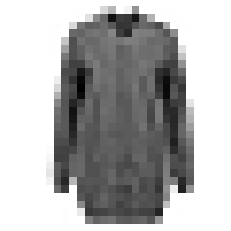

Our model predicted: Shirt
The actual answer was: Coat


In [12]:
import random
rand = random.randint(0,9999)

plt.subplot()
plt.axis('off')
plt.imshow(test_images[rand], cmap=plt.cm.binary)
plt.show()

prediction = np.argmax(predictions[rand])
actual = class_names[test_labels[rand]]
print(f'Our model predicted: {class_names[prediction]}')
print(f'The actual answer was: {actual}')

Below, we will show you how to make a prediction on a specific item and show it off

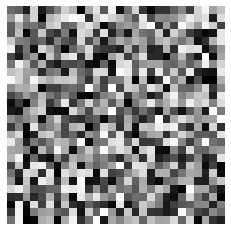

Our model predicted: Trouser


In [13]:
# Generating a random array of values to see what our AI does
random_picture = (np.random.rand(1,28,28)) * 255

plt.subplot()
plt.axis('off')
plt.imshow(random_picture[0], cmap=plt.cm.binary)
plt.show()

rand_pred = np.argmax(model.predict(random_picture))
print(f'Our model predicted: {class_names[rand_pred]}')

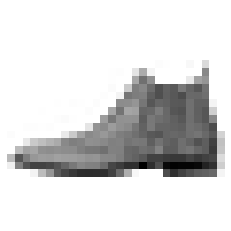

Our model predicted: Ankle boot
The actual answer was: Ankle boot


In [14]:
# Picking a single index that we want to show off
img_indx = 0
single_pic = np.array([test_images[img_indx]])

plt.subplot()
plt.axis('off')
plt.imshow(single_pic[img_indx], cmap=plt.cm.binary)
plt.show()

single_pred = np.argmax(model.predict(single_pic))
actual = class_names[test_labels[img_indx]]
print(f'Our model predicted: {class_names[single_pred]}')
print(f'The actual answer was: {actual}')